<a href="https://colab.research.google.com/github/aaolcay/Multi-Task-Learning/blob/main/multi_task_learning_feature_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Multi-task Learning**

I am sharing the code below that is on multi-task learning. We use the dataset from the Kaggle, more than 20000 face images, to classify their genders and races.

The code has been written by Abdullah A. Olcay.

###**Load Data**

In [ ]:
# Install Kaggle Python library
!pip install kaggle

In [ ]:
# Mounting Google Drive in Google Colab for Easy File Access
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
!pwd

/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/gdrive/MyDrive/Multi-task Learning/Data'

In [ ]:
# changing the working directory
%cd '/gdrive/MyDrive/Multi-task Learning/Data'

/gdrive/MyDrive/Multi-task Learning/Data


In [ ]:
# checking the current working directory
!pwd

/gdrive/MyDrive/Multi-task Learning/Data


In [ ]:
!kaggle datasets download -d nipunarora8/age-gender-and-ethnicity-face-data-csv

 77% 49.0M/63.2M [00:00<00:00, 115MB/s]
100% 63.2M/63.2M [00:00<00:00, 119MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  age-gender-and-ethnicity-face-data-csv.zip
replace age_gender.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: age_gender.csv          


####**Prepare Data**

In [ ]:
import pandas as pd

In [ ]:
!ls

age_gender.csv	kaggle.json  model.h5  model.json


In [ ]:
data = pd.read_csv('age_gender.csv')

In [ ]:
data.head(10)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
5,1,2,0,20161220144957407.jpg.chip.jpg,195 198 200 200 198 198 199 199 198 197 197 19...
6,1,2,0,20161220145040127.jpg.chip.jpg,208 216 217 219 222 223 222 221 220 220 221 22...
7,1,2,0,20170109191125532.jpg.chip.jpg,99 142 169 177 179 181 183 186 187 186 191 190...
8,1,2,0,20161219222749039.jpg.chip.jpg,127 127 133 140 143 148 152 157 160 165 172 17...
9,1,2,0,20170109191209991.jpg.chip.jpg,199 211 211 214 216 216 219 221 222 224 219 21...


In [ ]:
print("Length of data:", len(data))

Length of data: 23705


To divide the images into three distinct datasets, namely Train, Dev/Val, and dev sets, we have partitioned the data with the following proportions: 18505 samples for training and 2600 samples for development/validation and 2600 for test data.

In [ ]:
images = data.pixels
type(images[0])

str

In [ ]:
images = images.str.split(" ").tolist()
type(images[0])

list

In [ ]:
ages = data.age.astype('float')
type(ages[0])

numpy.float64

In [ ]:
races = data.ethnicity.astype('float')
type(races[0])

numpy.float64

In [ ]:
genders = data.gender.astype('float')
type(genders[0])

numpy.float64

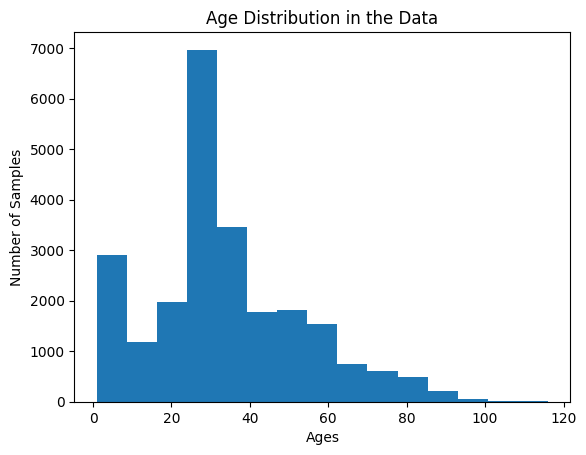

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(ages, bins=15)
plt.title('Age Distribution in the Data')
plt.ylabel('Number of Samples')
plt.xlabel('Ages')
plt.show()

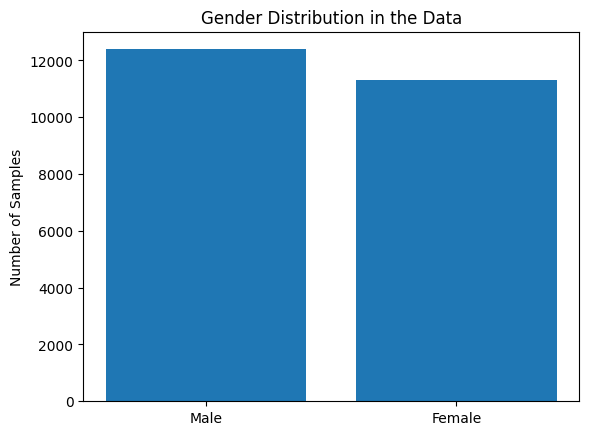

In [ ]:
import numpy as np
num_genders = len(np.unique(genders))
number_class = np.zeros(num_genders)
for i in range(num_genders):
  number_class[i] = len(np.where(genders==i)[0])
plt.figure()
labels_genders = ['Male', 'Female']
plt.bar(labels_genders, number_class)
plt.title('Gender Distribution in the Data')
plt.ylabel('Number of Samples')
plt.show()

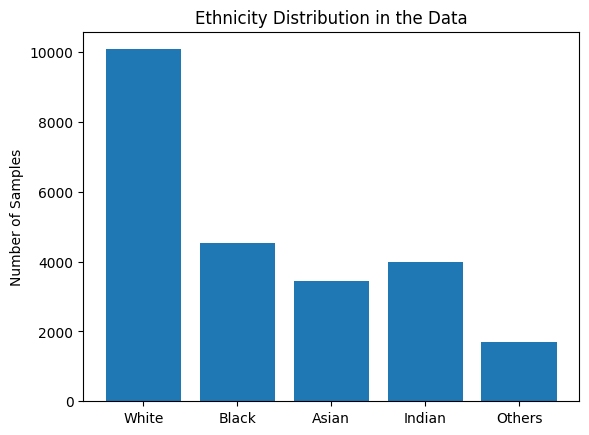

In [ ]:
num_races = len(np.unique(races))
number_class = np.zeros(num_races)
for i in range(num_races):
  number_class[i] = len(np.where(races==i)[0])
plt.figure()
labels_races = ['White', 'Black', 'Asian', 'Indian', 'Others']
plt.bar(labels_races, number_class)
plt.title('Ethnicity Distribution in the Data')
plt.ylabel('Number of Samples')
plt.show()

In [ ]:
images = np.array(images).reshape(-1,48,48,1).astype('float')
data_dict = {
        "images": [],
        "ages": [],
        "genders": [],
        "races": []
    }
for i in range(len(data)):
  data_dict["images"].append(images[i,:])
  data_dict["ages"].append(ages[i])
  data_dict["genders"].append(genders[i])
  data_dict["races"].append(races[i])

Make each label separate

In [ ]:
label_ages = np.array(data_dict["ages"])
label_genders = np.array(data_dict["genders"])
label_races =  np.array(data_dict["races"])

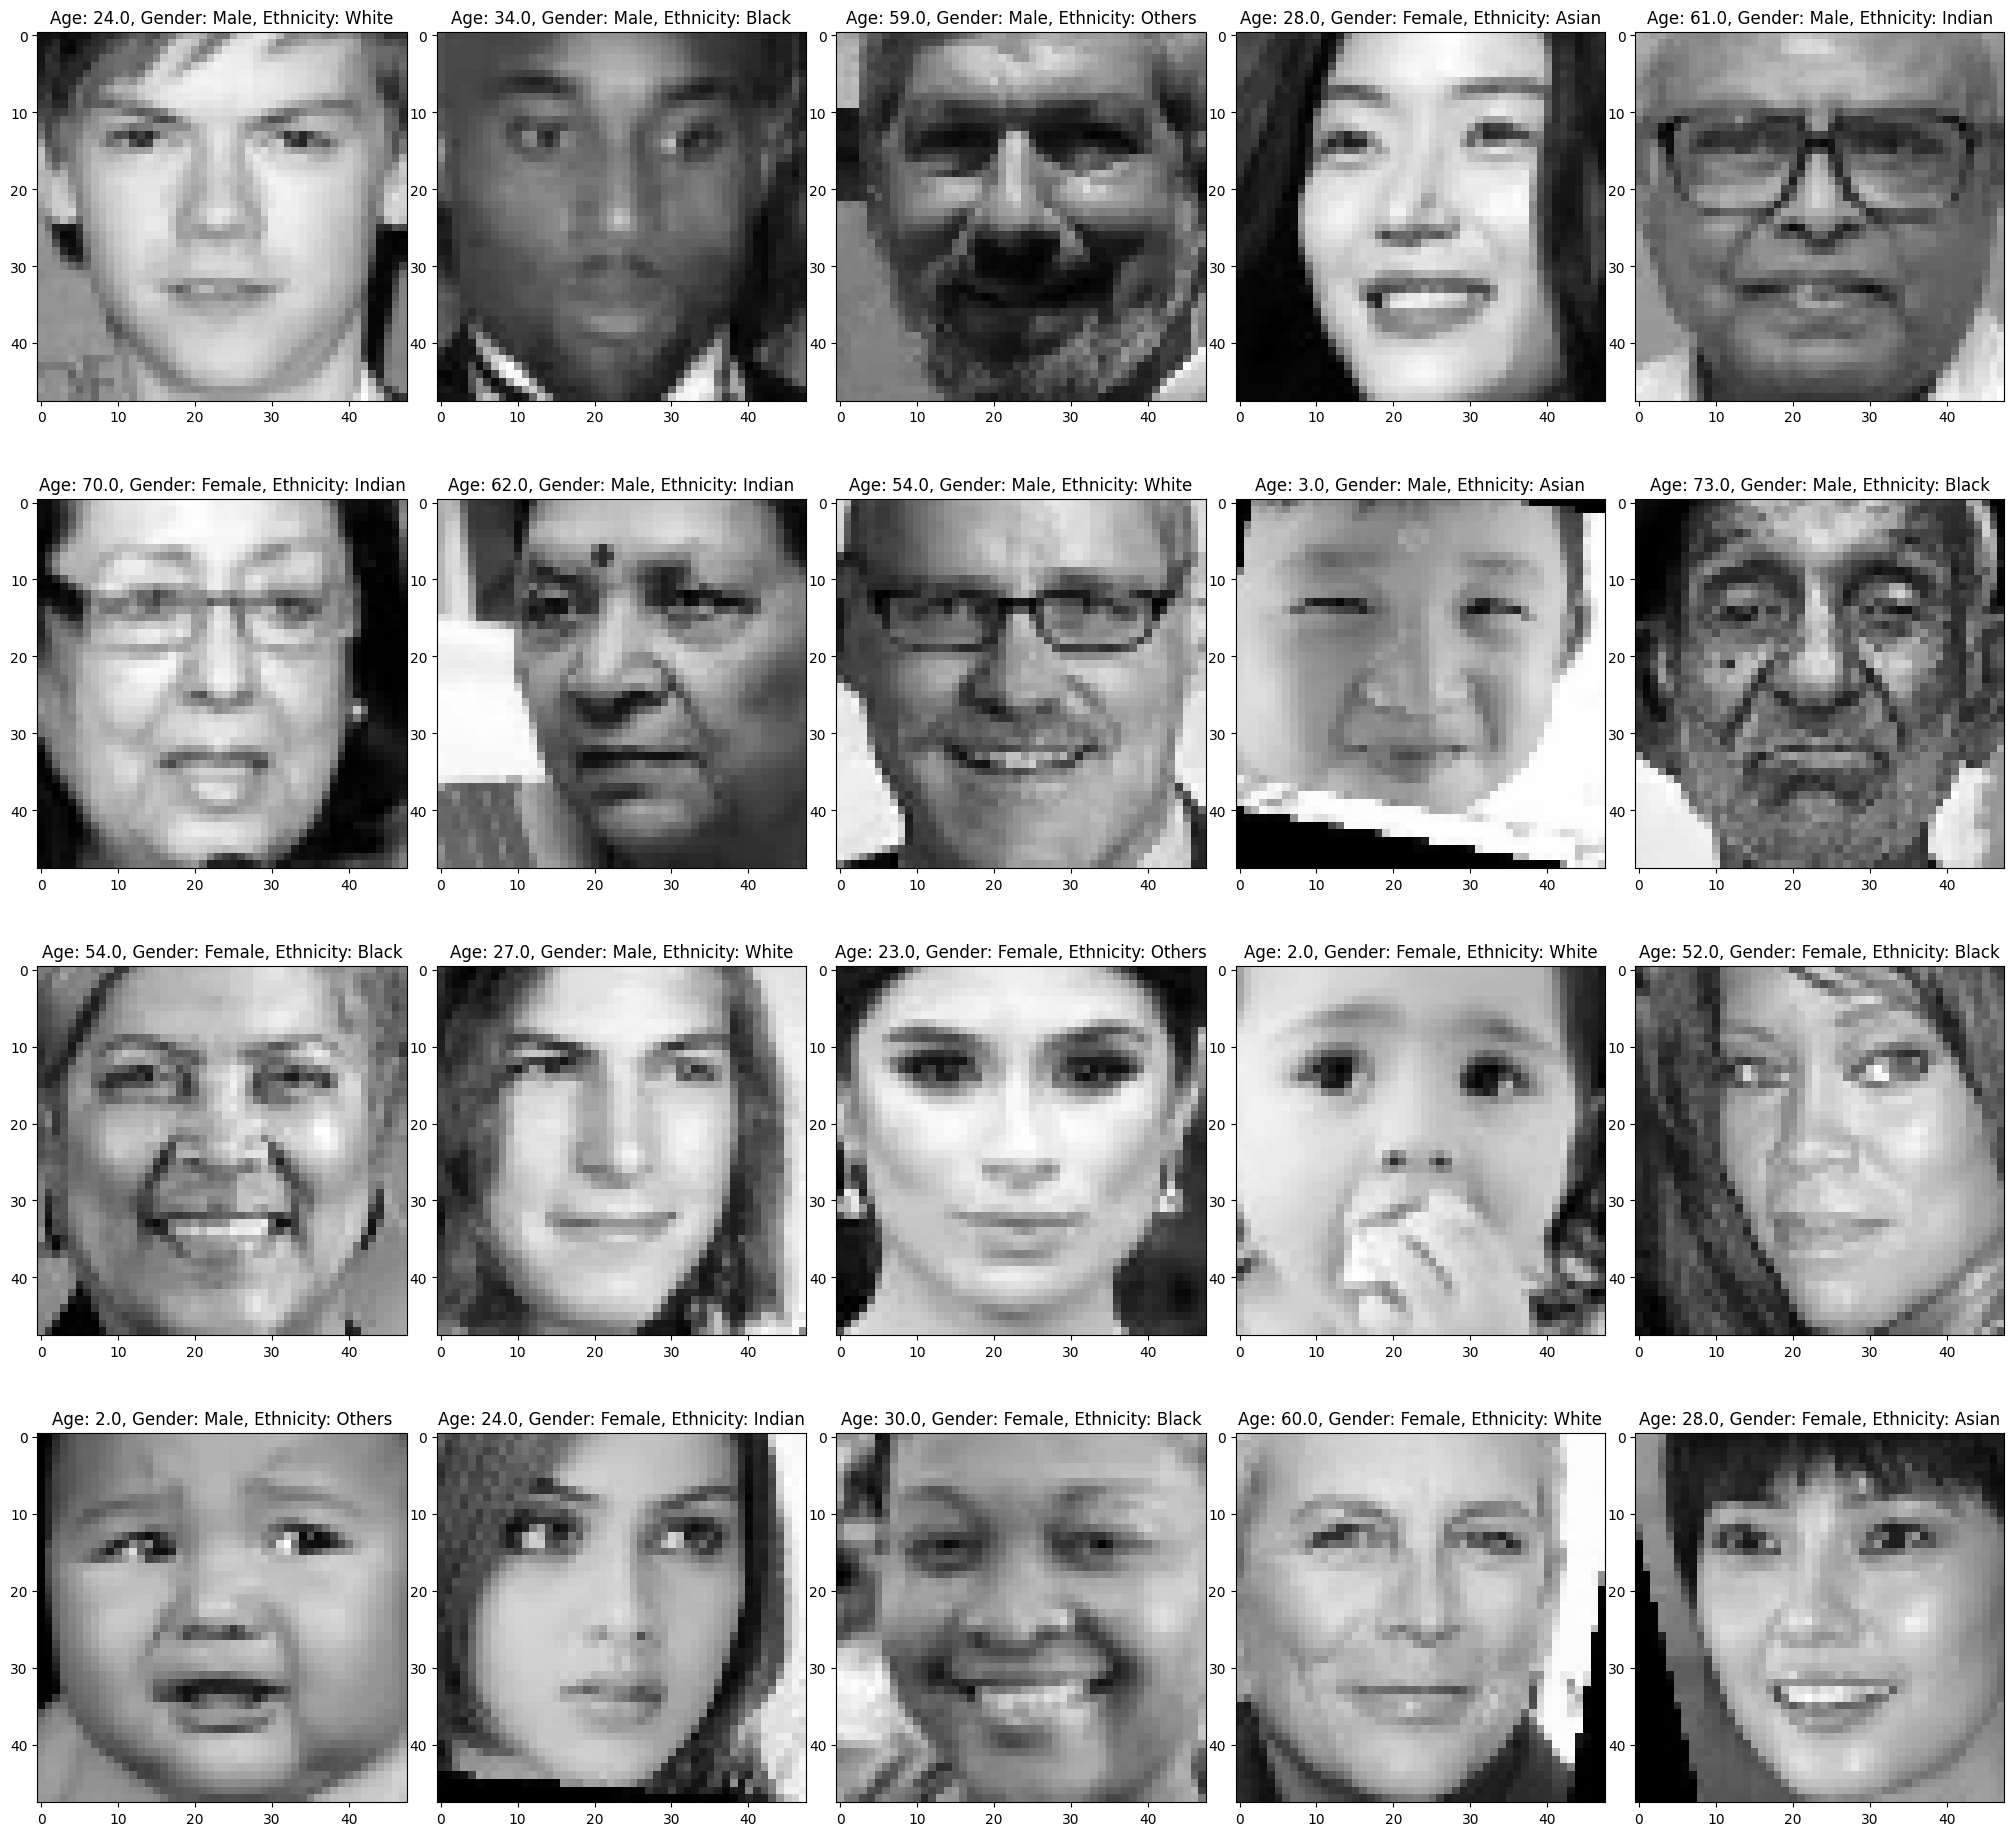

In [ ]:
random_numbers = np.random.randint(low=0, high=23704, size=20)
fig = plt.figure(figsize=(20,20))
count = 0
for k in random_numbers:
  fig.add_subplot(4,5,count+1)
  plt.imshow(images[k], cmap='gray')
  label_g = labels_genders[int(label_genders[k])]
  label_r = labels_races[int(label_races[k])]
  plt.title(f"Age: {label_ages[k]}, Gender: {label_g}, Ethnicity: {label_r}")
  fig.tight_layout(pad=0.2)
  count += 1

In [ ]:
# Shuffle data
np.random.seed(1)
idx = np.random.permutation(len(data))

In [ ]:
train_label_ages = label_ages[idx[0:18505]]
train_label_genders = label_genders[idx[0:18505]]
train_label_races = label_races[idx[0:18505]]
train_images =images[idx[0:18505],:,:,:]

In [ ]:
val_label_ages = label_ages[idx[18505:18505+2600]]
val_label_genders = label_genders[idx[18505:18505+2600]]
val_label_races = label_races[idx[18505:18505+2600]]
val_images =images[idx[18505:18505+2600],:,:,:]

In [ ]:
test_label_ages = label_ages[idx[18505+2600:18505+2600+2600]]
test_label_genders = label_genders[idx[18505+2600:18505+2600+2600]]
test_label_races = label_races[idx[18505+2600:18505+2600+2600]]
test_images =images[idx[18505+2600:18505+2600+2600],:,:,:]

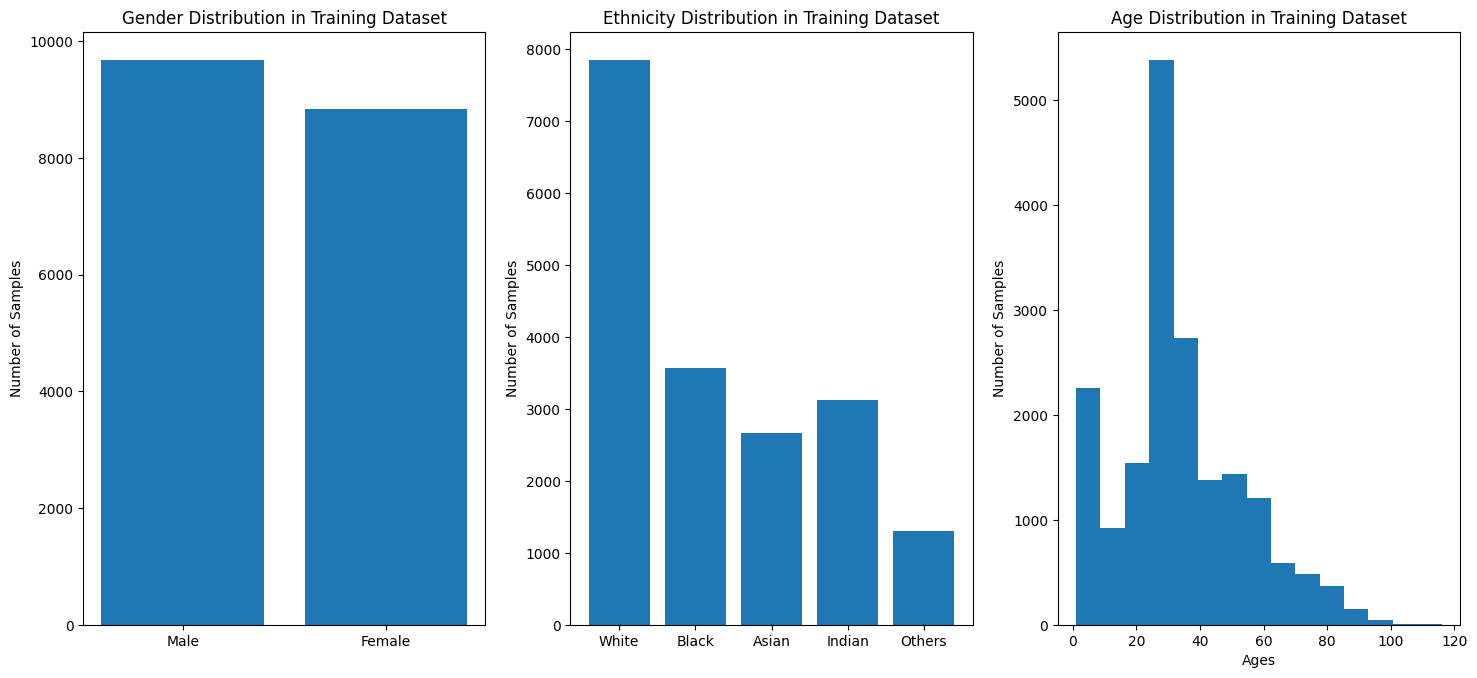

In [ ]:
num_genders_train = len(np.unique(train_label_genders))
number_class_g_t = np.zeros(num_genders_train)
for i in range(num_genders_train):
  number_class_g_t[i] = len(np.where(train_label_genders==i)[0])

num_races_train = len(np.unique(train_label_races))
number_class_r_t = np.zeros(num_races_train)
for i in range(num_races_train):
  number_class_r_t[i] = len(np.where(train_label_races==i)[0])

fig = plt.figure(figsize=(15,7))
fig.add_subplot(1,3,1)
plt.bar(labels_genders, number_class_g_t)
plt.title('Gender Distribution in Training Dataset')
plt.ylabel('Number of Samples')
fig.add_subplot(1,3,2)
plt.bar(labels_races, number_class_r_t)
plt.title('Ethnicity Distribution in Training Dataset')
plt.ylabel('Number of Samples')
fig.add_subplot(1,3,3)
plt.hist(train_label_ages, bins=15)
plt.title('Age Distribution in Training Dataset')
plt.ylabel('Number of Samples')
plt.xlabel('Ages')
fig.tight_layout(pad=1.5)
plt.show()

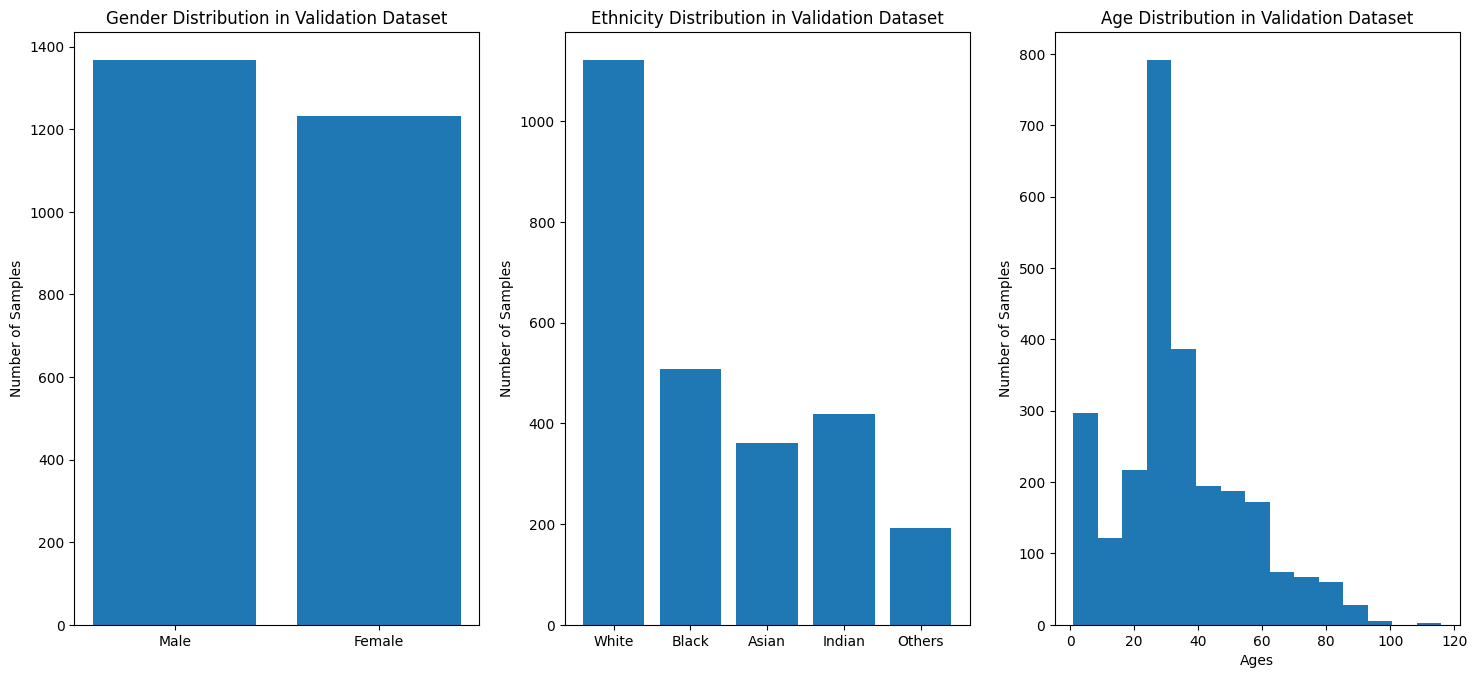

In [ ]:
num_genders_val = len(np.unique(val_label_genders))
number_class_g_v = np.zeros(num_genders_val)
for i in range(num_genders_val):
  number_class_g_v[i] = len(np.where(val_label_genders==i)[0])

num_races_val = len(np.unique(val_label_races))
number_class_r_v = np.zeros(num_races_val)
for i in range(num_races_val):
  number_class_r_v[i] = len(np.where(val_label_races==i)[0])

fig = plt.figure(figsize=(15,7))
fig.add_subplot(1,3,1)
plt.bar(labels_genders, number_class_g_v)
plt.title('Gender Distribution in Validation Dataset')
plt.ylabel('Number of Samples')
fig.add_subplot(1,3,2)
plt.bar(labels_races, number_class_r_v)
plt.title('Ethnicity Distribution in Validation Dataset')
plt.ylabel('Number of Samples')
fig.add_subplot(1,3,3)
plt.hist(val_label_ages, bins=15)
plt.title('Age Distribution in Validation Dataset')
plt.ylabel('Number of Samples')
plt.xlabel('Ages')
fig.tight_layout(pad=1.5)
plt.show()

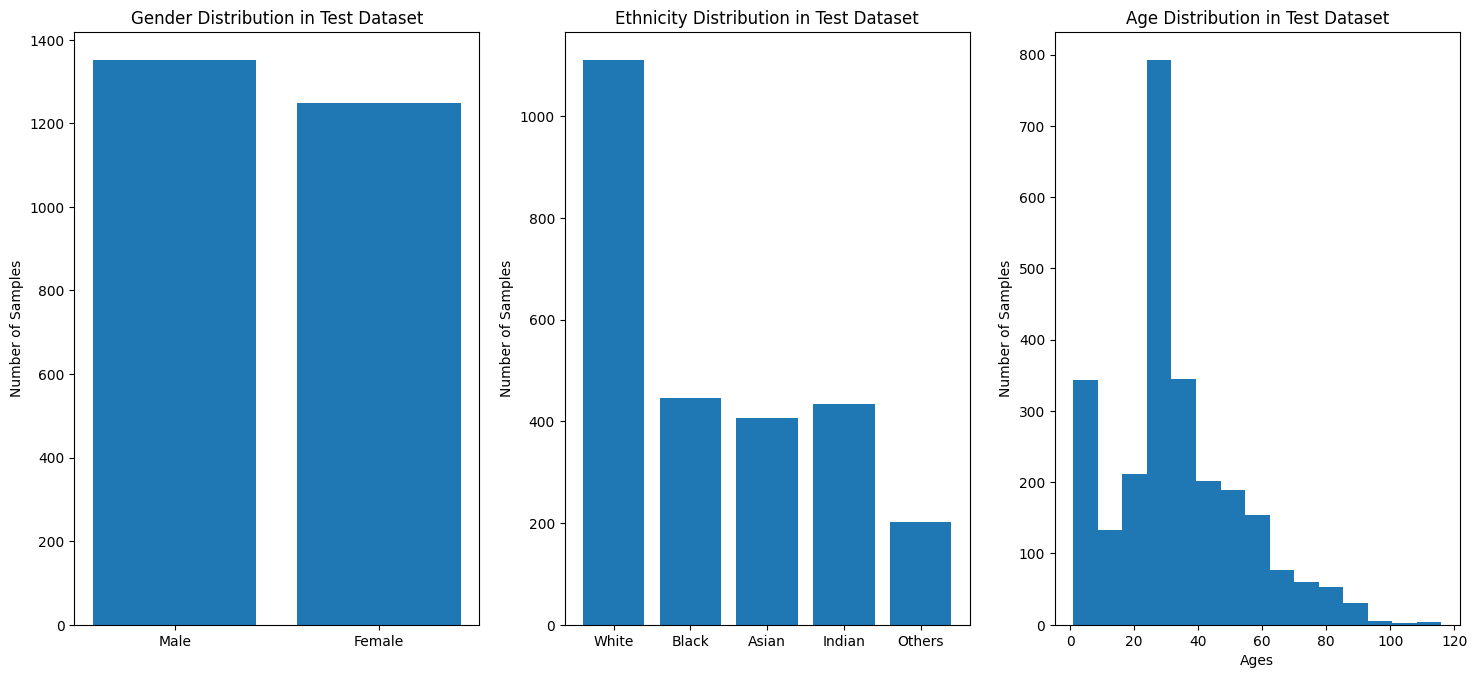

In [ ]:
num_genders_test = len(np.unique(test_label_genders))
number_class_g_t = np.zeros(num_genders_test)
for i in range(num_genders_test):
  number_class_g_t[i] = len(np.where(test_label_genders==i)[0])

num_races_test = len(np.unique(test_label_races))
number_class_r_t = np.zeros(num_races_test)
for i in range(num_races_test):
  number_class_r_t[i] = len(np.where(test_label_races==i)[0])

fig = plt.figure(figsize=(15,7))
fig.add_subplot(1,3,1)
plt.bar(labels_genders, number_class_g_t)
plt.title('Gender Distribution in Test Dataset')
plt.ylabel('Number of Samples')
fig.add_subplot(1,3,2)
plt.bar(labels_races, number_class_r_t)
plt.title('Ethnicity Distribution in Test Dataset')
plt.ylabel('Number of Samples')
fig.add_subplot(1,3,3)
plt.hist(test_label_ages, bins=15)
plt.title('Age Distribution in Test Dataset')
plt.ylabel('Number of Samples')
plt.xlabel('Ages')
fig.tight_layout(pad=1.5)
plt.show()

Augment Training Data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Assuming you have an original dataset X_train and corresponding labels y_train

# Create the instance of the ImageDataGenerator with desired augmentation settings
datagen1 = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images by 10 degrees
    width_shift_range=0.1,  # randomly shift images horizontally by 10% of the width
    height_shift_range=0.1,  # randomly shift images vertically by 10% of the height
    horizontal_flip=True,  # randomly flip images horizontally
    zoom_range=0.01  # randomly zoom images by 1%
)

# Fit each data generator on your original dataset separately
datagen1.fit(train_images)

# Initialize an empty list to store augmented data and labels
augmented_images = []
augmented_label_ages = []
augmented_label_genders = []
augmented_label_races = []

# Generate augmented samples by applying transformations from the first data generator
for i in range(len(train_images)):
  count = 1
  im = train_images[i, :, :, :]
  im = im[np.newaxis, :]
  for X_batch in datagen1.flow(im, batch_size=1):
      augmented_images.extend(X_batch)
      augmented_label_ages.append(train_label_ages[i])
      augmented_label_genders.append(train_label_genders[i])
      augmented_label_races.append(train_label_races[i])
      count +=1
      if count>2:
        break

# Convert the augmented data and labels to numpy arrays
augmented_images = np.array(augmented_images)
augmented_label_ages = np.array(augmented_label_ages)
augmented_label_genders = np.array(augmented_label_genders)
augmented_label_races = np.array(augmented_label_races)

# Combine the original datasets with augmented data
final_train = np.concatenate((train_images, augmented_images))
final_label_ages = np.concatenate((train_label_ages, augmented_label_ages))
final_label_genders = np.concatenate((train_label_genders, augmented_label_genders))
final_label_races = np.concatenate((train_label_races, augmented_label_races))

0
18505
18506
1
18507
18508
2
18509
18510
3
18511
18512
4
18513
18514
5
18515
18516
6


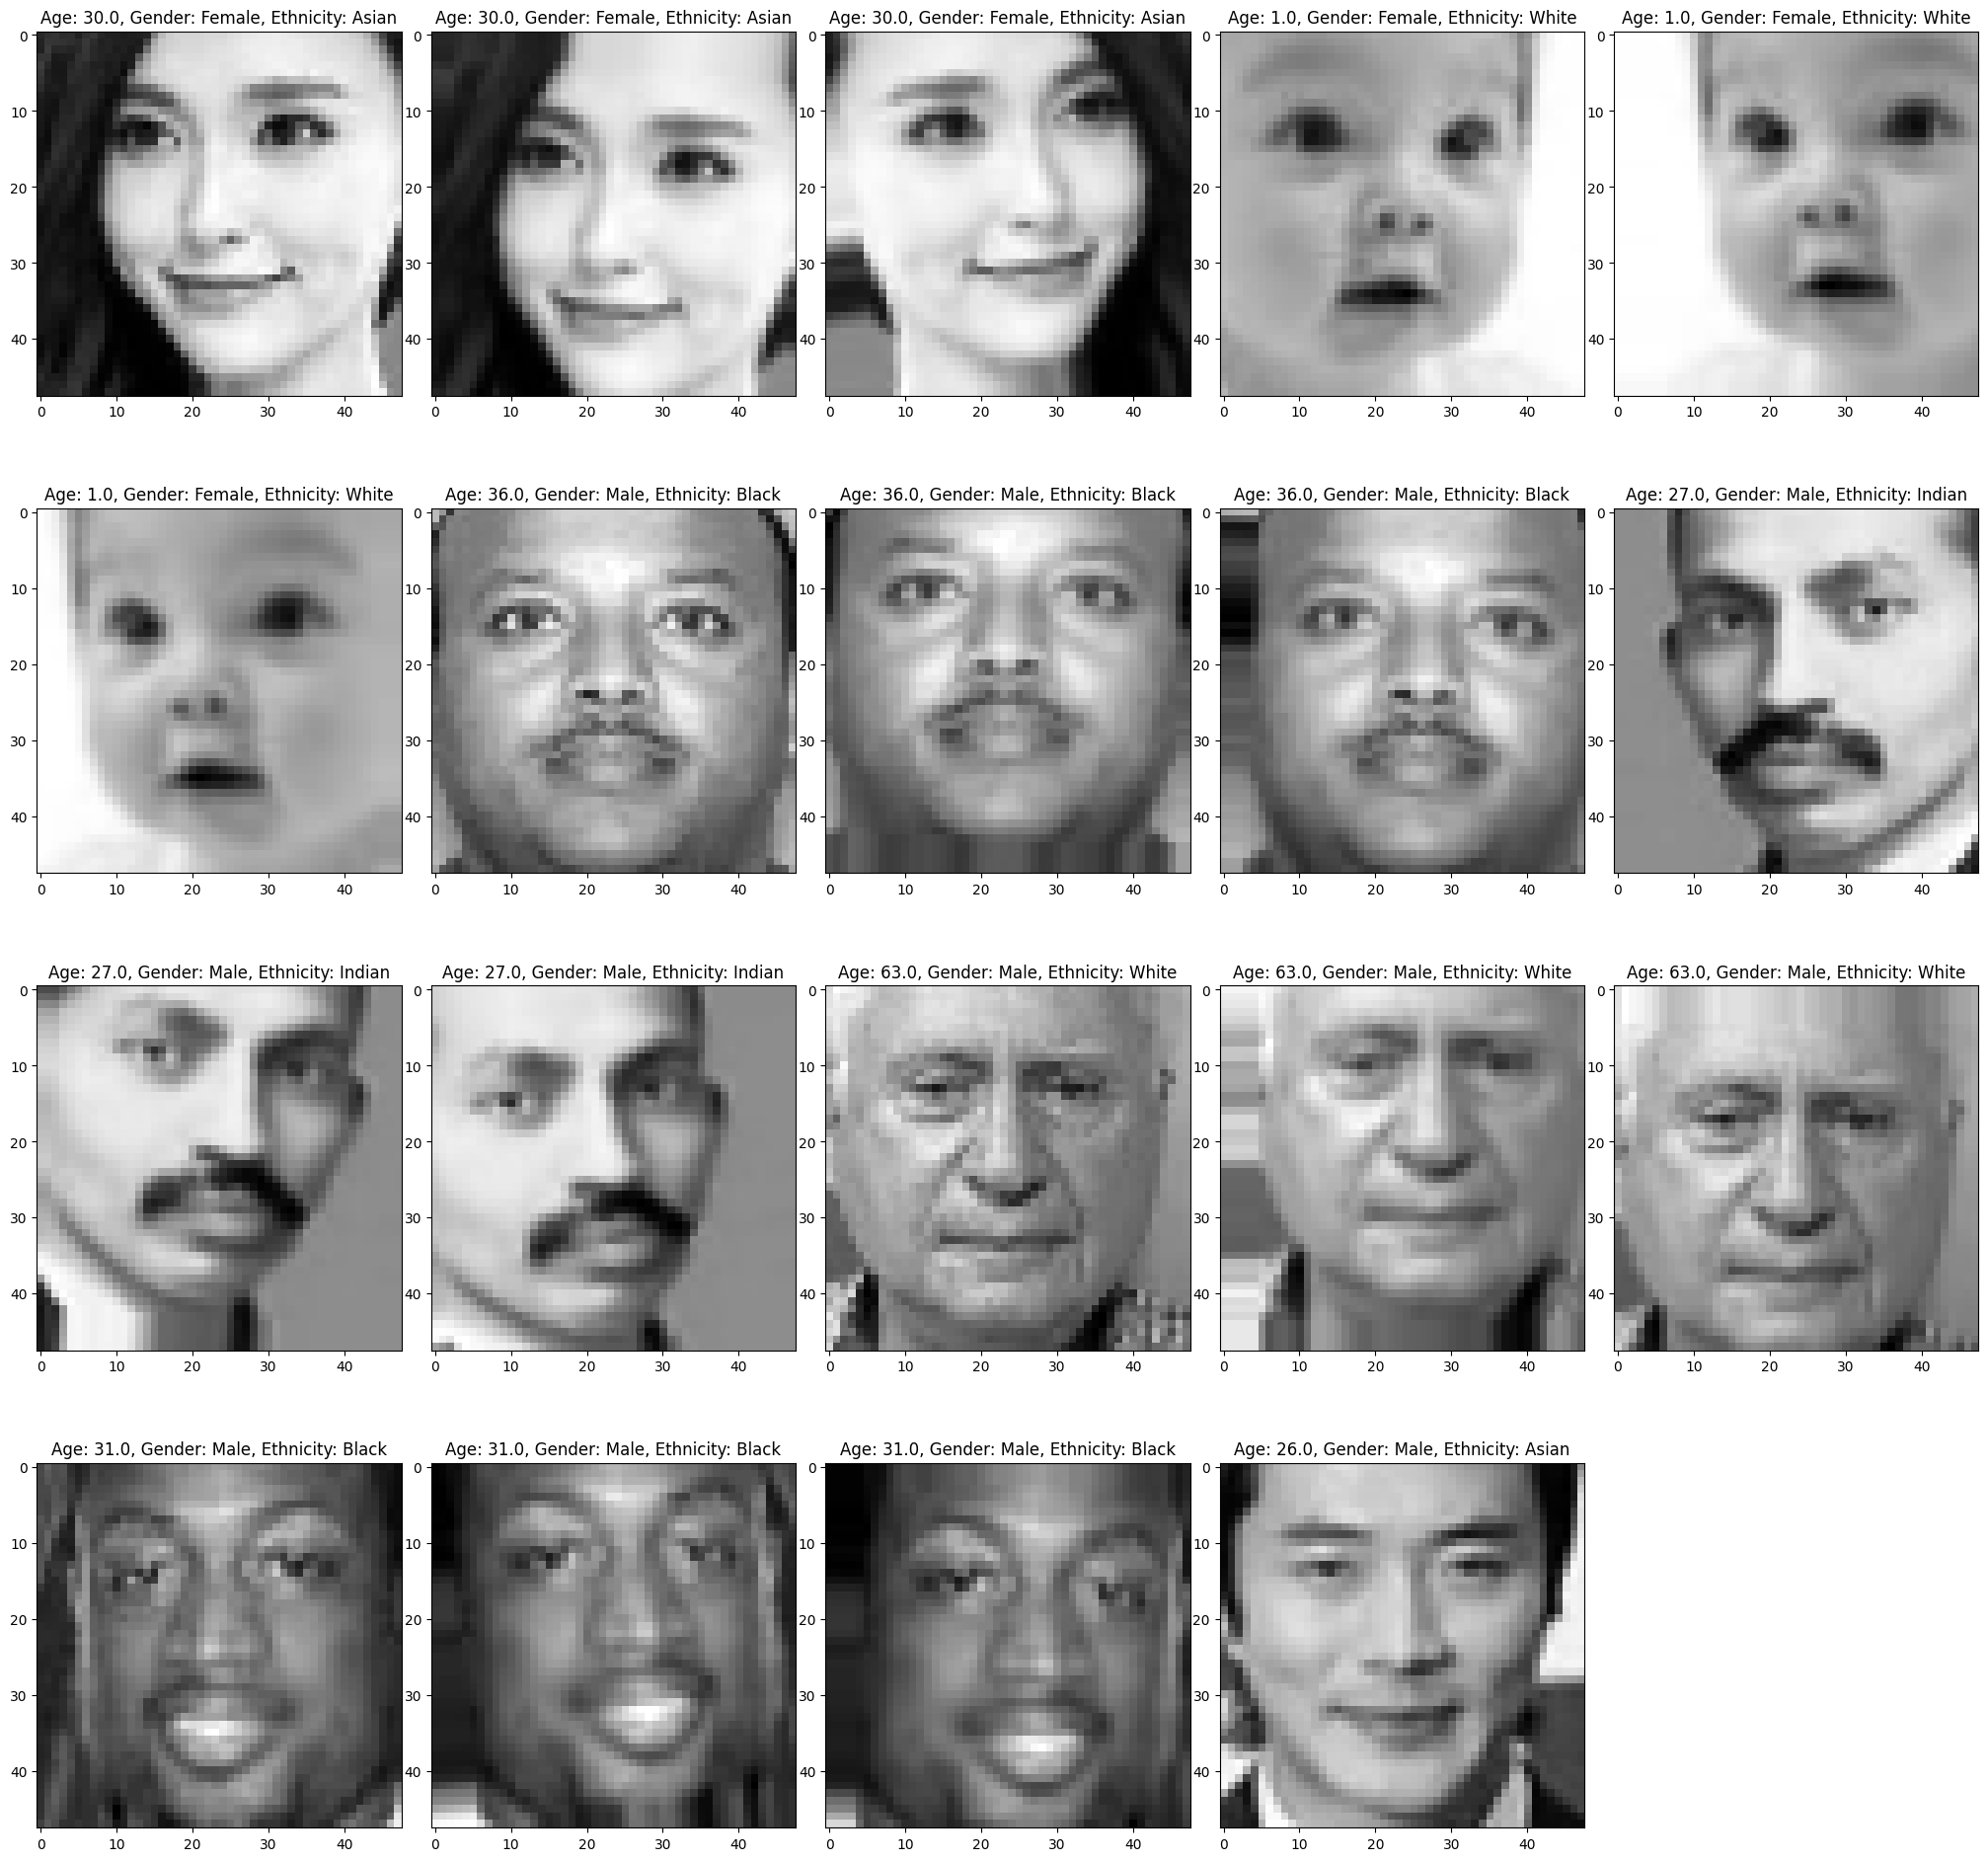

In [ ]:
fig = plt.figure(figsize=(20,20))
ind = [0, 18505, 18505+1, 1, 18505+2, 18505+3, 2, 18505+4, 18505+5, 3, 18505+6, 18505+7, 4, 18505+8, 18505+9, 5, 18505+10, 18505+11, 6]
count = 0
for k in ind:
  print(k)
  fig.add_subplot(4,5,count+1)
  plt.imshow(final_train[k], cmap='gray')
  label_g = labels_genders[int(final_label_genders[k])]
  label_r = labels_races[int(final_label_races[k])]
  plt.title(f"Age: {final_label_ages[k]}, Gender: {label_g}, Ethnicity: {label_r}")
  fig.tight_layout(pad=0.2)
  count += 1

In [ ]:
# Shuffle the combined datasets
indices = np.random.permutation(final_train.shape[0])
aug_train = final_train[indices]
aug_label_ages = final_label_ages[indices]
aug_label_genders = final_label_genders[indices]
aug_label_races = final_label_races[indices]

2866
44359
1669
39712
42113
36264
5891
33037
42199
30327
27462
52007
42116
9622
21409
31749
38480
12498
7288
48780


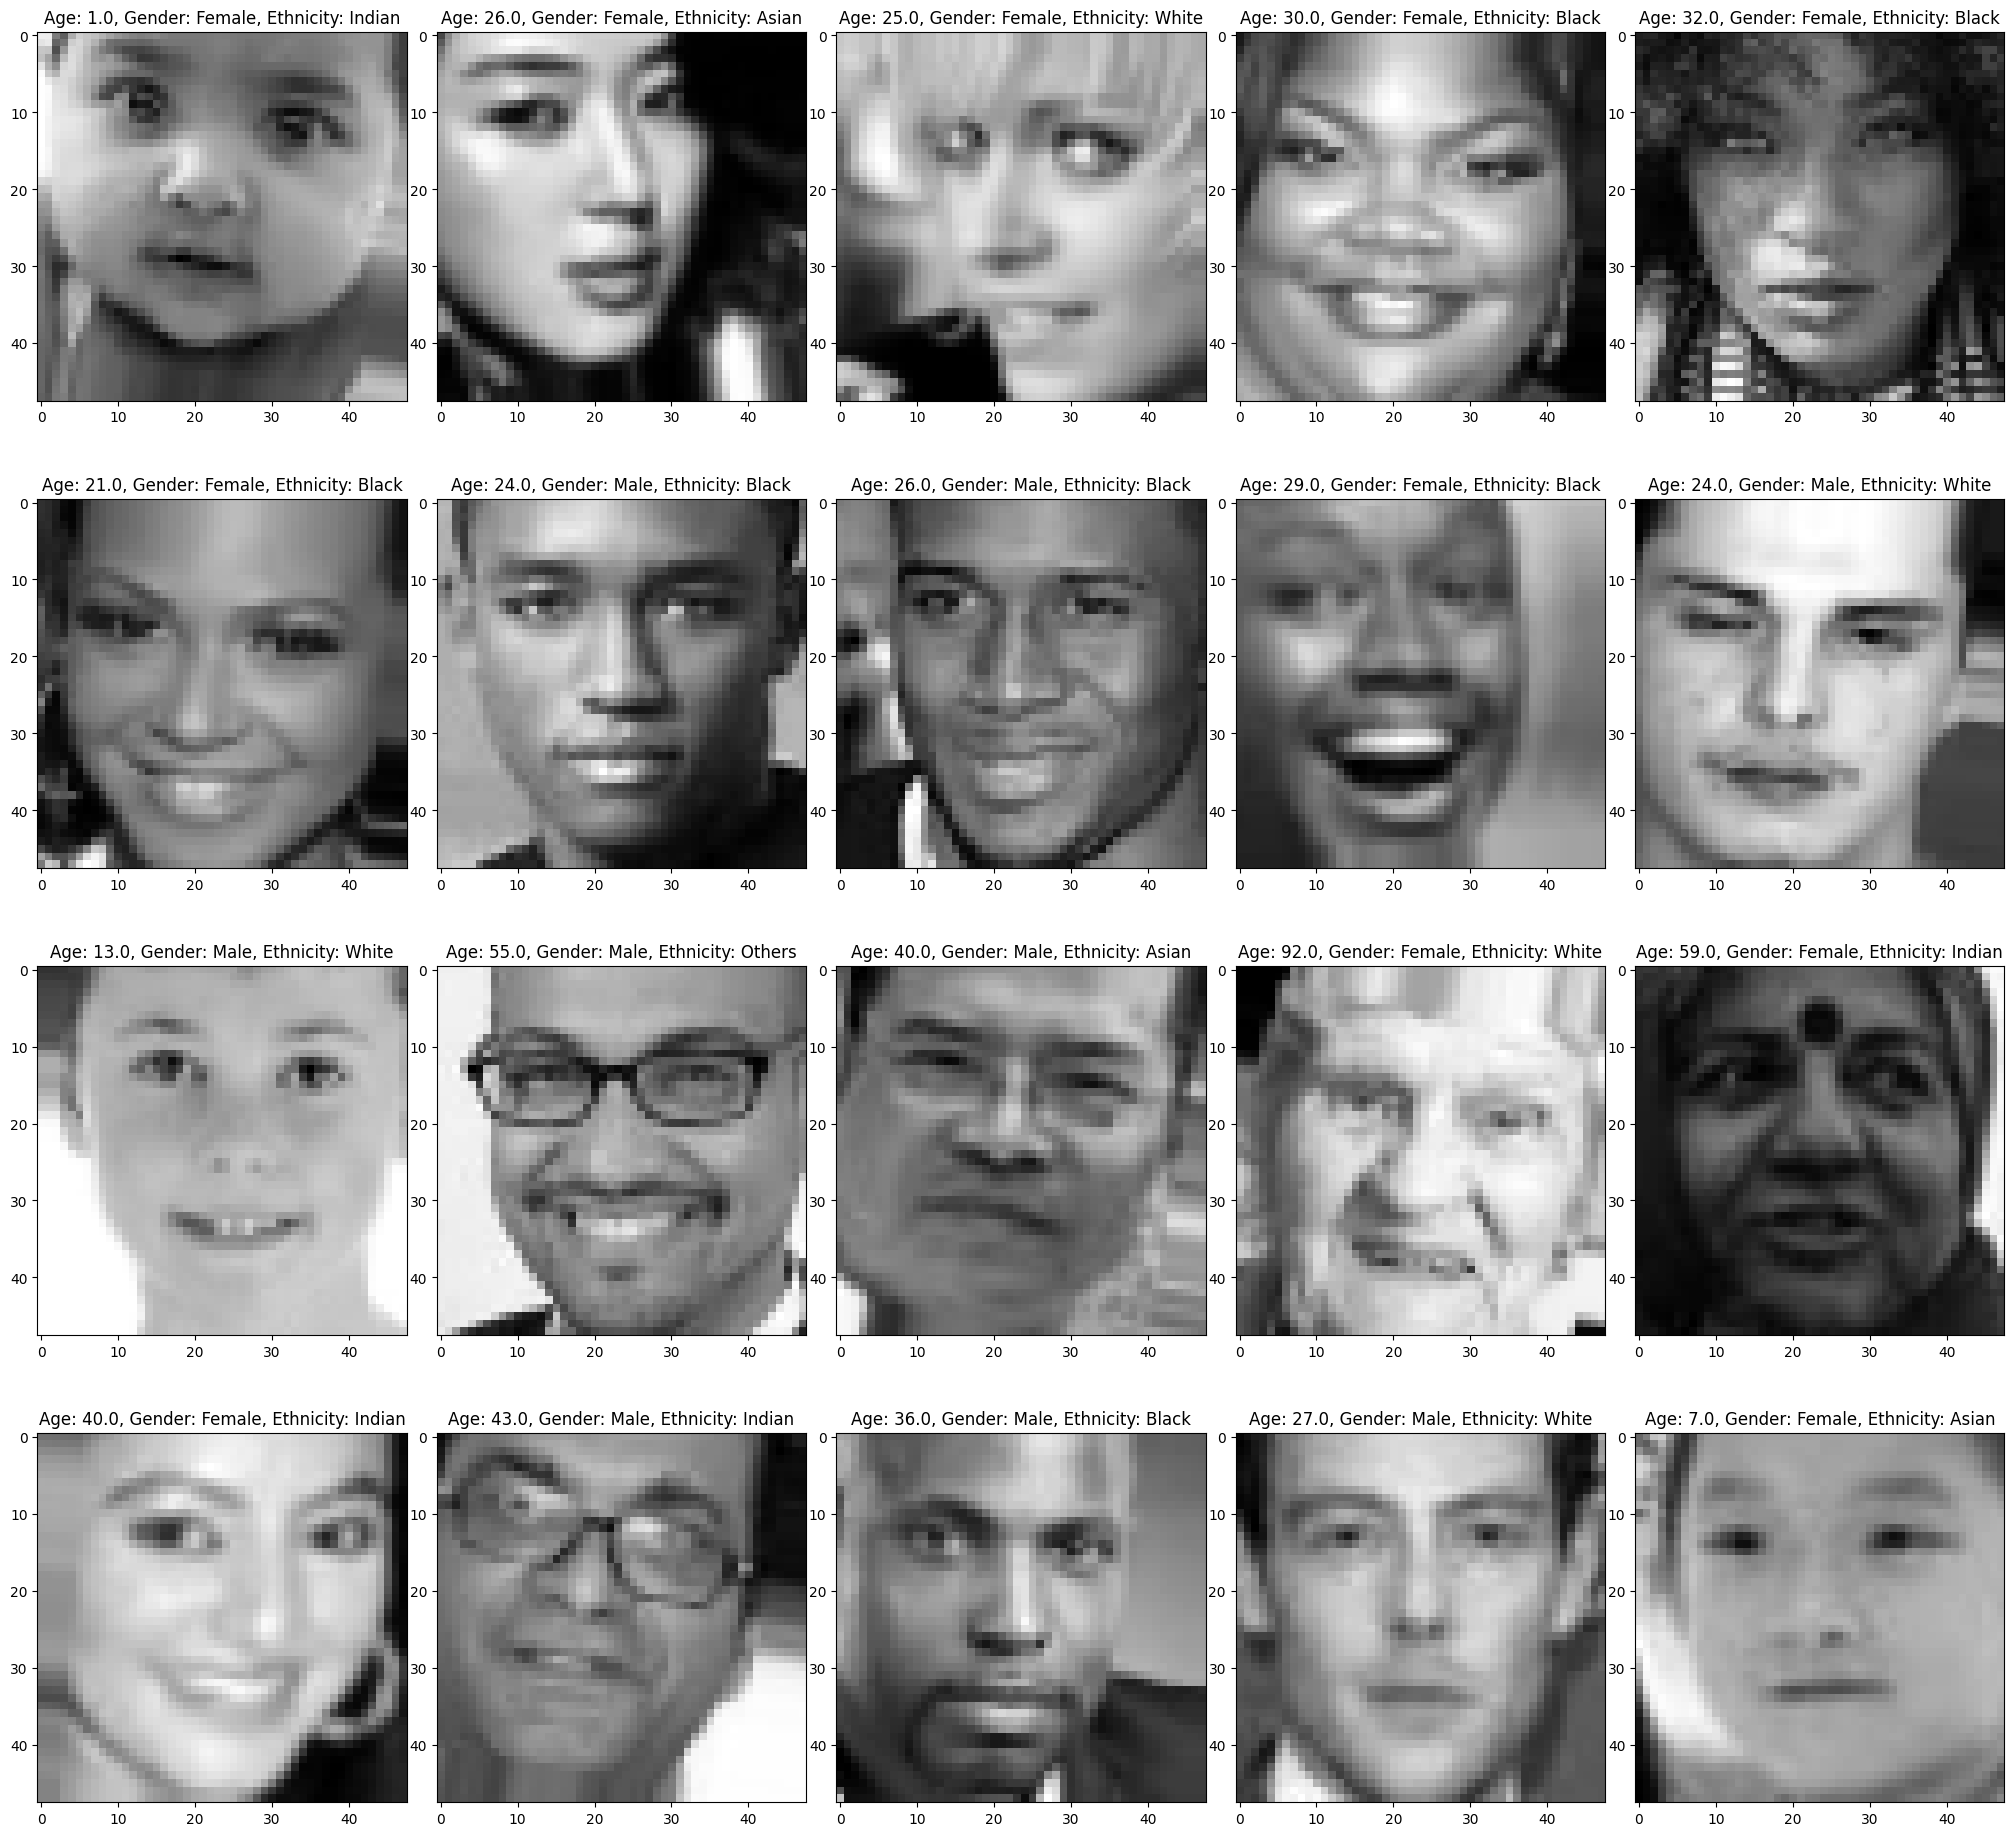

In [ ]:
random_numbers = np.random.randint(low=0, high=55512, size=20)
fig = plt.figure(figsize=(20,20))
count = 0
for k in random_numbers:
  print(k)
  fig.add_subplot(4,5,count+1)
  plt.imshow(aug_train[k], cmap='gray')
  label_g = labels_genders[int(aug_label_genders[k])]
  label_r = labels_races[int(aug_label_races[k])]
  plt.title(f"Age: {aug_label_ages[k]}, Gender: {label_g}, Ethnicity: {label_r}")
  fig.tight_layout(pad=0.2)
  count += 1

Transfer Learning

In [ ]:
from tensorflow.keras.applications import VGG16

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the weights and bias terms in the base model
base_model.trainable = True

# Print the model summary
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
import tensorflow.keras as keras
# Change the fully-connected layer for multi-task learning
# Add our own classification layers
x = keras.layers.GlobalAveragePooling2D()(base_model.output)

# Task specific branches
# ethnicity
ethnicity_output = keras.layers.Dense(64,
                                      activation='relu',
                                      name='ethnicity_dense_1')(x)
ethnicity_output = keras.layers.Dropout(0.5)(ethnicity_output)
ethnicity_output = keras.layers.Dense(5,
                                      activation='softmax',
                                      name='ethnicity_output')(ethnicity_output) # for ethnicity

# gender
gender_output = keras.layers.Dense(64,
                                   activation='relu',
                                   name='gender_dense_1')(x)
gender_output = keras.layers.Dropout(0.5)(gender_output)
gender_output = keras.layers.Dense(1, activation='sigmoid', name='gender_output')(gender_output) # for gender

# Multi-task Classifier (Model)
model = keras.models.Model(inputs=base_model.input, outputs=[ethnicity_output, gender_output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 48, 48, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 block1_conv2 (Conv2D)          (None, 48, 48, 64)   36928       ['block1_conv1[0][0]']           
                                                                                                  
 block1_pool (MaxPooling2D)     (None, 24, 24, 64)   0           ['block1_conv2[0][0]']           
                                                                                              

In [ ]:
# Compile the model
# Specify the loss functions for each output
losses = {
    'ethnicity_output': 'categorical_crossentropy',
    'gender_output': 'binary_crossentropy'
}

# Specify the metrics for each output
metrics = {
    'ethnicity_output': 'accuracy',
    'gender_output': 'accuracy'
}

model.compile(optimizer='adam', loss=losses, metrics=metrics, weighted_metrics=metrics)

In [ ]:
# Convert grayscale images to RGB and scale pixel values
train_rgb_images = np.stack((aug_train,) * 3, axis=-1) / 255.0
val_rgb_images = np.stack((val_images,) * 3, axis=-1) / 255.0
test_rgb_images = np.stack((test_images,) * 3, axis=-1) / 255.0

# Remove extra dimension
train_rgb_images = np.squeeze(train_rgb_images)
val_rgb_images = np.squeeze(val_rgb_images)
test_rgb_images = np.squeeze(test_rgb_images)

In [ ]:
print(f"The shape of train, validation and test iamges:\n train data shape: {train_rgb_images.shape}\n validation data shape: {val_rgb_images.shape}\n test data shape: {test_rgb_images.shape}")

The shape of train, validation and test iamges:
 train data shape: (55515, 48, 48, 3)
 validation data shape: (2600, 48, 48, 3)
 test data shape: (2600, 48, 48, 3)


148
20408
27593
16927
48674
54529
8859
14390
39762
30838
8092
18577
44858
12545
23800
14777
22322
17028
16490
44873


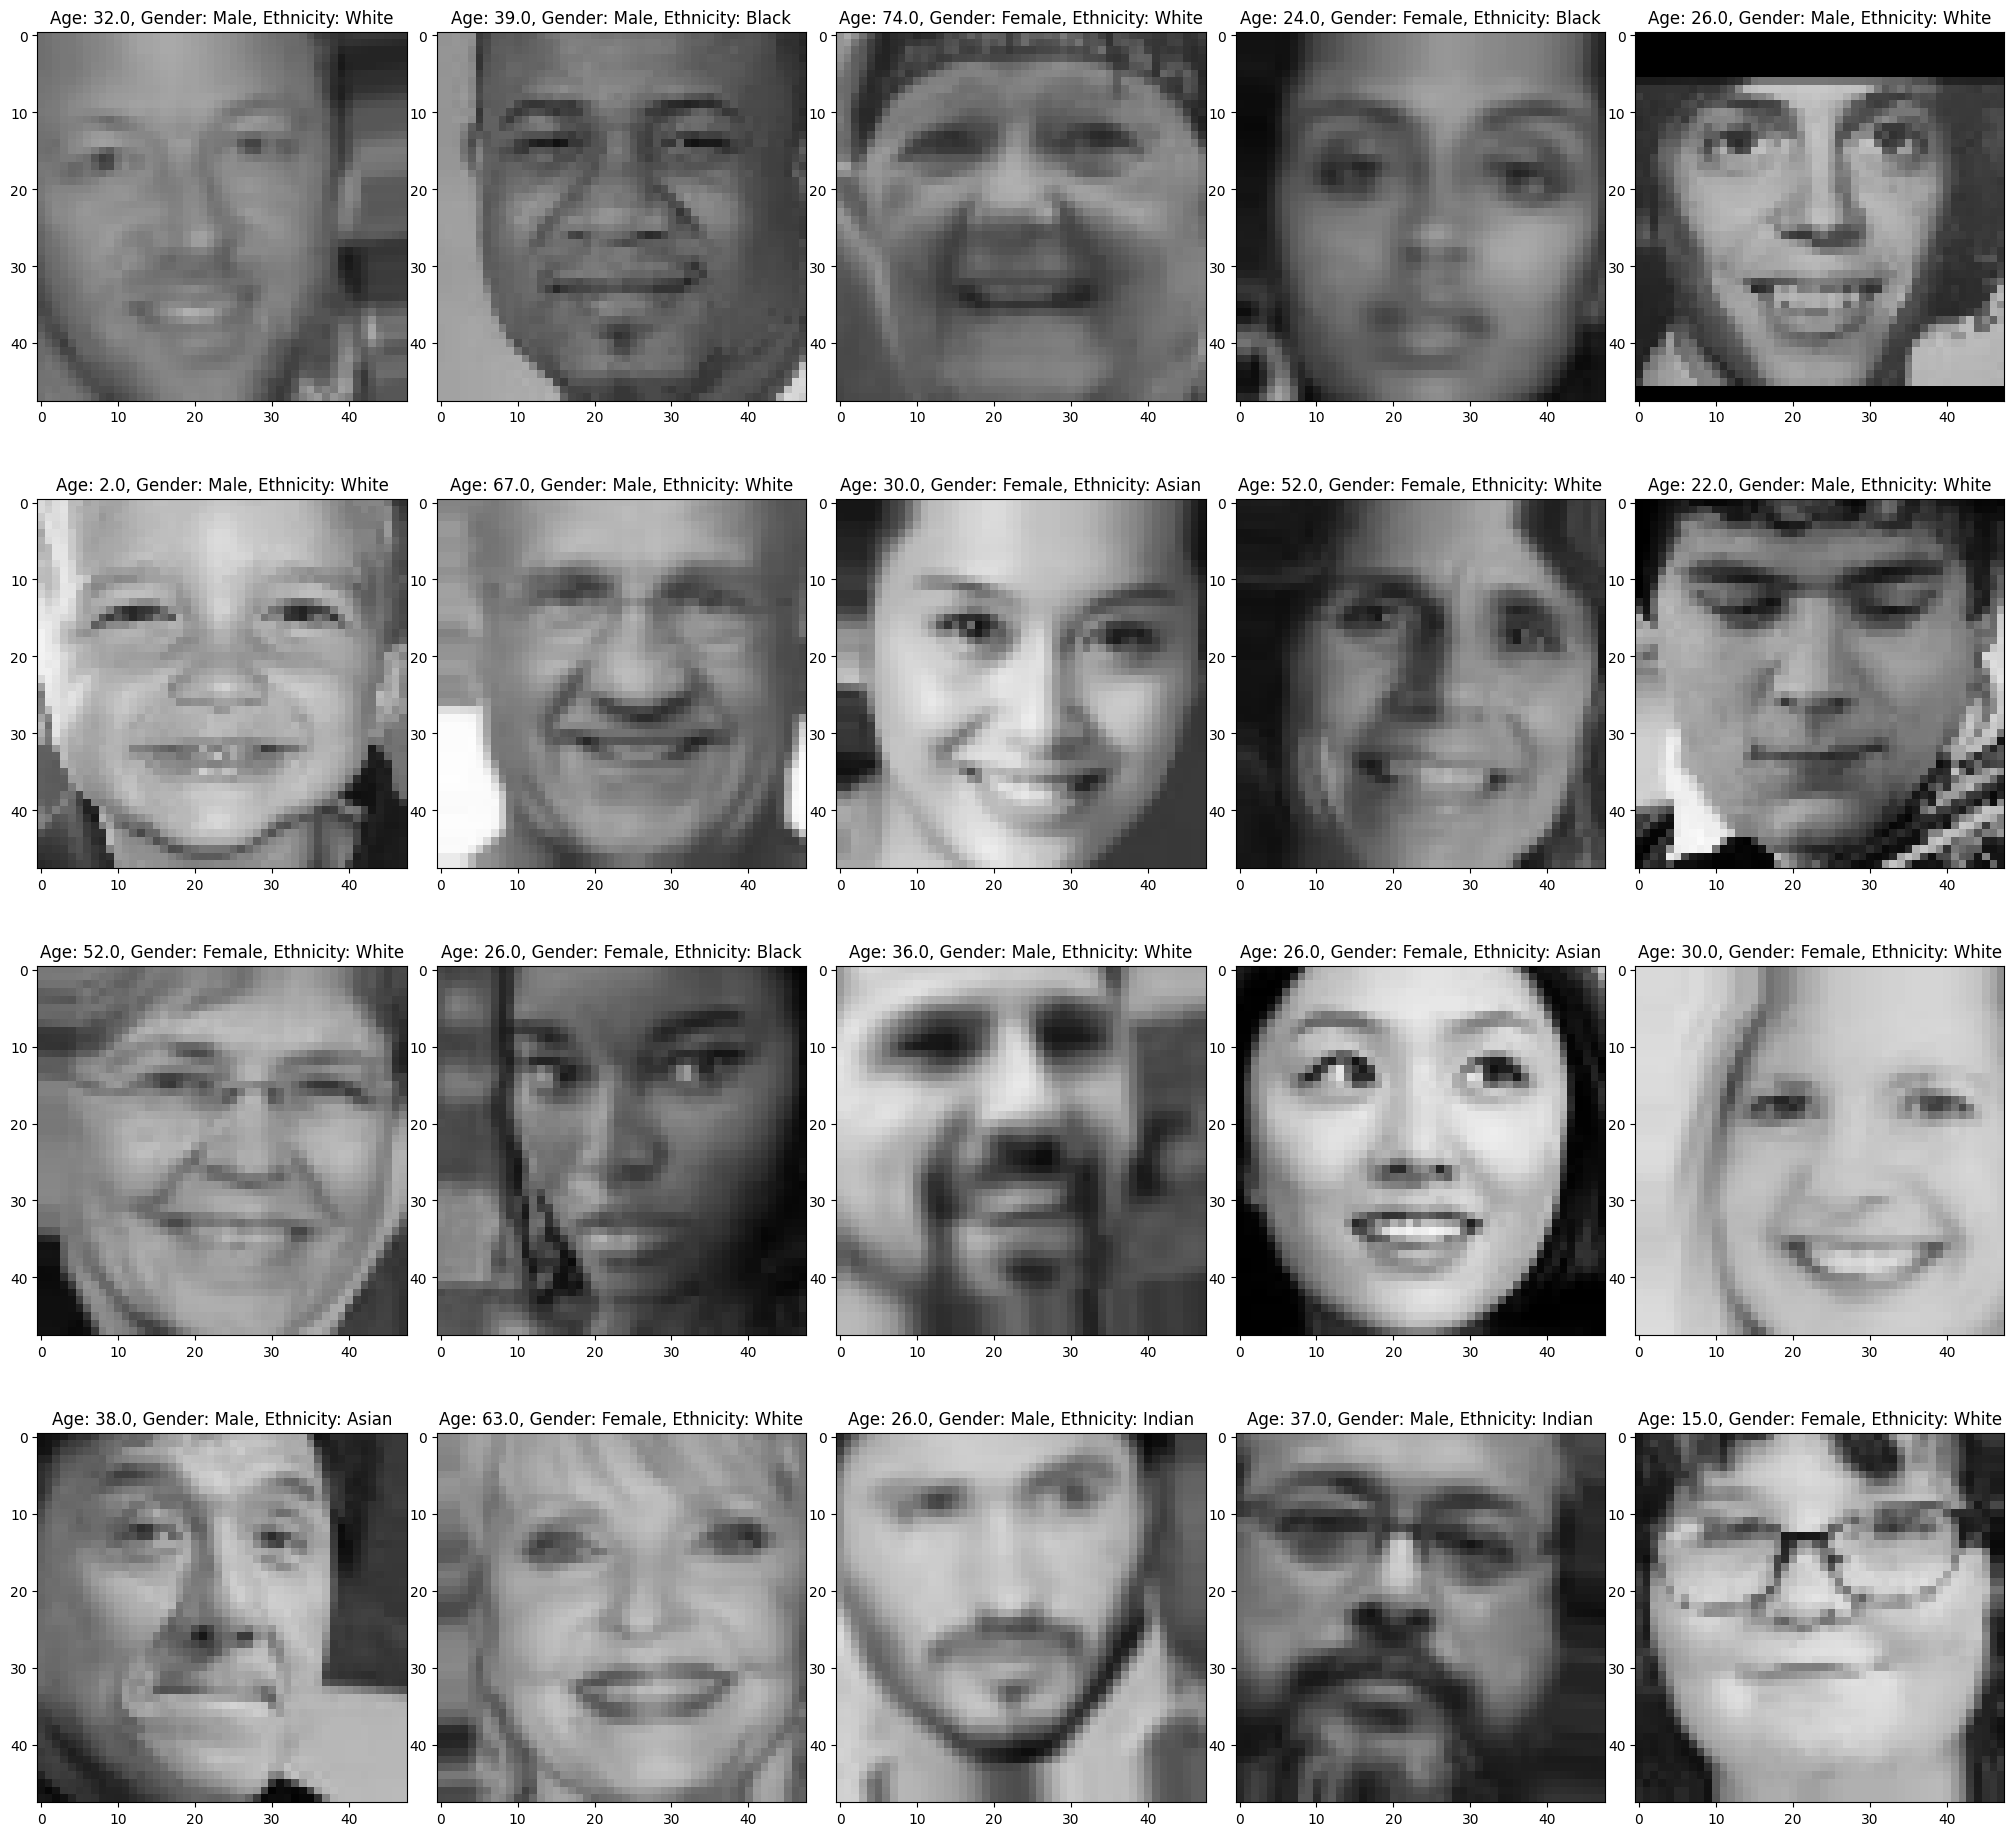

In [ ]:
random_numbers = np.random.randint(low=0, high=55512, size=20)
fig = plt.figure(figsize=(20,20))
count = 0
for k in random_numbers:
  print(k)
  fig.add_subplot(4,5,count+1)
  plt.imshow(train_rgb_images[k], cmap='gray')
  label_g = labels_genders[int(aug_label_genders[k])]
  label_r = labels_races[int(aug_label_races[k])]
  plt.title(f"Age: {aug_label_ages[k]}, Gender: {label_g}, Ethnicity: {label_r}")
  fig.tight_layout(pad=0.2)
  count += 1

In [ ]:
aug_label_races = keras.utils.to_categorical(aug_label_races, 5)
val_label_races = keras.utils.to_categorical(val_label_races, 5)
test_label_races = keras.utils.to_categorical(test_label_races, 5)

In [ ]:
from keras.callbacks import LearningRateScheduler, EarlyStopping

early_stopping = EarlyStopping(monitor='val_gender_output_loss', patience=25)

# Decayin learning rate
"""
def lr_schedule(epoch, lr):
    start_lr = 0.1  # Starting learning rate
    decay_factor = 0.1  # Decay factor
    decay_step = 25    # Decay step

    if epoch != 0 and epoch % decay_step == 0:
      lr = lr * decay_factor
    if epoch == 0:
      lr = start_lr
    return lr
"""

# Create the LearningRateScheduler callback
#lr_scheduler = LearningRateScheduler(lr_schedule)

y_val = {'ethnicity_output': val_label_races, 'gender_output': val_label_genders}
# Train the model
history = model.fit(x=train_rgb_images,
          y={'ethnicity_output': aug_label_races, 'gender_output': aug_label_genders},
          validation_data=(val_rgb_images, y_val),
          batch_size=64,
          epochs=200,
          shuffle=True,
          callbacks=[early_stopping])
          #callbacks=[lr_scheduler])

Epoch 1/200
868/868 [==============================] - 74s 63ms/step - loss: 1.7298 - ethnicity_output_loss: 1.2129 - gender_output_loss: 0.5169 - ethnicity_output_accuracy: 0.5484 - ethnicity_output_weighted_accuracy: 0.5484 - gender_output_accuracy: 0.7383 - gender_output_weighted_accuracy: 0.7383 - val_loss: 1.2269 - val_ethnicity_output_loss: 0.8976 - val_gender_output_loss: 0.3293 - val_ethnicity_output_accuracy: 0.6592 - val_ethnicity_output_weighted_accuracy: 0.6592 - val_gender_output_accuracy: 0.8558 - val_gender_output_weighted_accuracy: 0.8558
Epoch 2/200
868/868 [==============================] - 53s 62ms/step - loss: 1.2015 - ethnicity_output_loss: 0.8732 - gender_output_loss: 0.3283 - ethnicity_output_accuracy: 0.6977 - ethnicity_output_weighted_accuracy: 0.6977 - gender_output_accuracy: 0.8597 - gender_output_weighted_accuracy: 0.8597 - val_loss: 0.9958 - val_ethnicity_output_loss: 0.7221 - val_gender_output_loss: 0.2737 - val_ethnicity_output_accuracy: 0.7508 - val_ethn

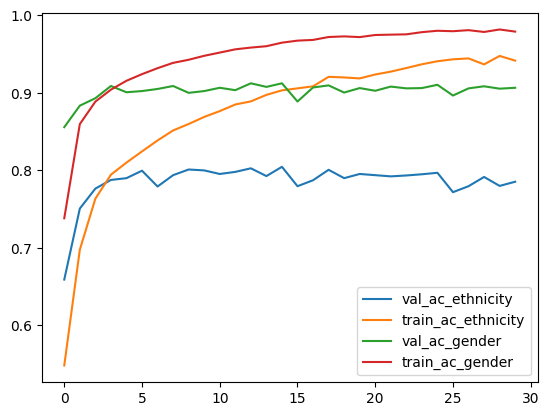

In [ ]:
plt.figure()
plt.plot(history.history['val_ethnicity_output_accuracy'], label='val_ac_ethnicity')
plt.plot(history.history['ethnicity_output_accuracy'], label='train_ac_ethnicity')
plt.plot(history.history['val_gender_output_accuracy'], label='val_ac_gender')
plt.plot(history.history['gender_output_accuracy'], label='train_ac_gender')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import model_from_json
# save model
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load model
json_file = open('model.json', 'r')

loaded_model_json = json_file.read()

json_file.close()

loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")

print("Loaded model from disk")

Loaded model from disk


In [ ]:
# Compile the loaded model
loaded_model.compile(optimizer='adam', loss=losses, metrics=metrics, weighted_metrics=metrics)

# Evaluate the loaded model on the test data for both outputs
score = loaded_model.evaluate(x=test_rgb_images, y={'ethnicity_output': test_label_races, 'gender_output': test_label_genders})

# Print the accuracies for gender and ethnicity
gender_accuracy_index = loaded_model.metrics_names.index('gender_output_accuracy')
ethnicity_accuracy_index = loaded_model.metrics_names.index('ethnicity_output_accuracy')
gender_accuracy = score[gender_accuracy_index]
ethnicity_accuracy = score[ethnicity_accuracy_index]

print("Gender Accuracy: %.2f%%" % (gender_accuracy * 100))
print("Ethnicity Accuracy: %.2f%%" % (ethnicity_accuracy * 100))

82/82 [==============================] - 4s 20ms/step - loss: 1.4684 - ethnicity_output_loss: 1.0145 - gender_output_loss: 0.4539 - ethnicity_output_accuracy: 0.7773 - ethnicity_output_weighted_accuracy: 0.7773 - gender_output_accuracy: 0.8919 - gender_output_weighted_accuracy: 0.8919
Gender Accuracy: 89.19%
Ethnicity Accuracy: 77.73%


Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Extract predicted probabilities for gender and ethnicity
y_hat_prob_scores = loaded_model.predict(x=test_rgb_images)
y_hat_prob_gender = y_hat_prob_scores[1]
y_hat_prob_ethnicity = y_hat_prob_scores[0]

82/82 [==============================] - 1s 12ms/step


First, for the ethnicity:

In [ ]:
from sklearn.metrics import roc_curve, auc
n_classes = y_hat_prob_ethnicity.shape[1]
# Compute the FPR, TPR, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_label_races[:,i], y_hat_prob_ethnicity[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(test_label_races.ravel(), y_hat_prob_ethnicity.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

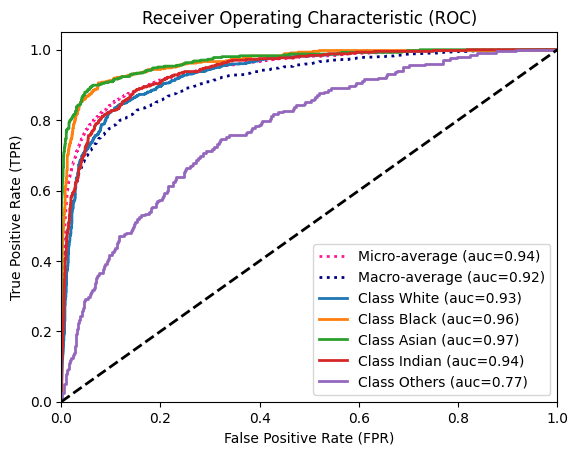

In [ ]:
# Compute macro-average ROC curve and AUC
# It seems there is a mismatch in the shape
# of the FPR and TPR arrays for different classes,
# causing the ValueError when trying to calculate the mean.
# To resolve this issue, you can interpolate the FPR and TPR arrays
# to have the same length before calculating the mean.

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average (auc={0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average (auc={0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=2)

for i in range(5):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {0} (auc={1:0.2f})'
             ''.format(labels_races[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

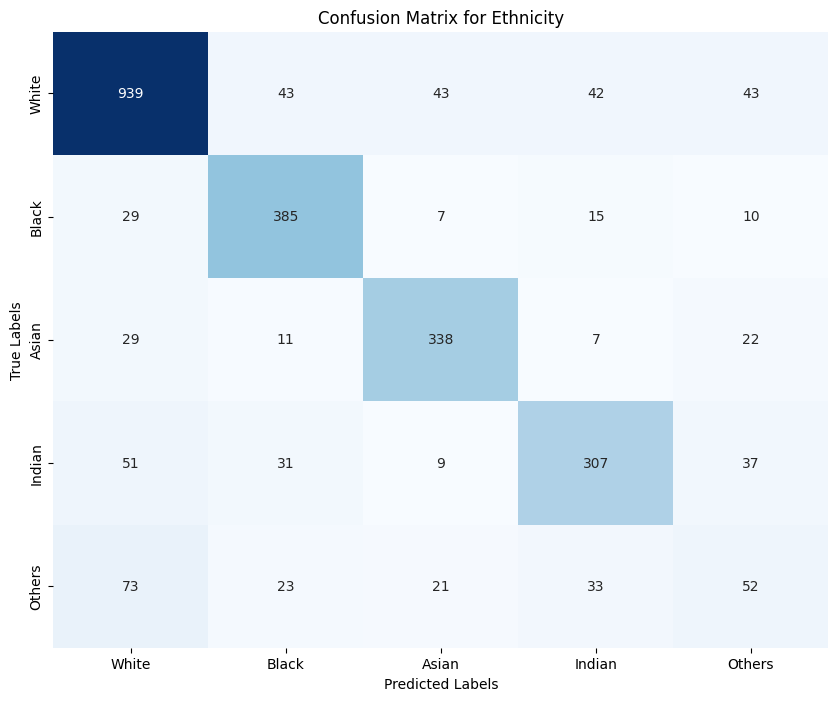

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Compute confusion matrix
cm = confusion_matrix(test_label_races.argmax(axis=1), y_hat_prob_ethnicity.argmax(axis=1))

# Create class labels
class_labels = [str(labels_races[i]) for i in range(n_classes)]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix for Ethnicity')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Let's do the same thing for the evaluation of gender classification

In [ ]:
n_classes = y_hat_prob_gender.shape[1]
# Compute the FPR, TPR, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
test_label_genders = test_label_genders[:, np.newaxis]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_label_genders[:,i], y_hat_prob_gender[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(test_label_genders, y_hat_prob_gender.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

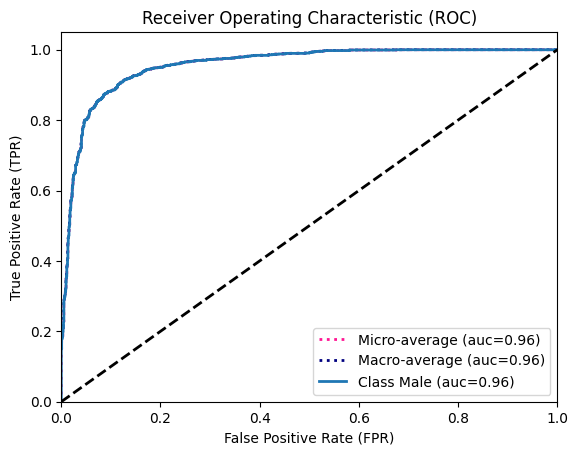

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average (auc={0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average (auc={0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=2)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {0} (auc={1:0.2f})'
             ''.format(labels_genders[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Test on different images

1/1 [==============================] - 0s 413ms/step


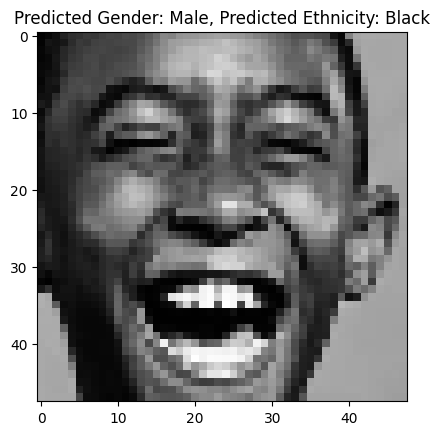

In [ ]:
test_im = test_rgb_images[10]
test_im = test_im[np.newaxis, :]
predictions = loaded_model.predict(test_im)
if predictions[1] >= 0.5:
  predicted_gender = 1
else:
  predicted_gender = 0

predicted_ethnicity = np.argmax(predictions[0])
plt.imshow(test_im[0,:,:,0], cmap='gray')
plt.title(f"Predicted Gender: {labels_genders[predicted_gender]}, Predicted Ethnicity: {labels_races[predicted_ethnicity]}")
plt.show()

In [ ]:
random_numbers = np.random.randint(low=0, high=test_rgb_images.shape[0], size=20)
count = 0
predicted_ethnicity = []
predicted_gender = []
for k in random_numbers:
  fig.add_subplot(4,5,count+1)
  test_im = test_rgb_images[k]
  test_im = test_im[np.newaxis, :]
  predictions = loaded_model.predict(test_im)
  if predictions[1] >= 0.5:
    predicted_gender.append(1)
  else:
    predicted_gender.append(0)
  predicted_ethnicity.append(np.argmax(predictions[0]))

1/1 [==============================] - 0s 20ms/step


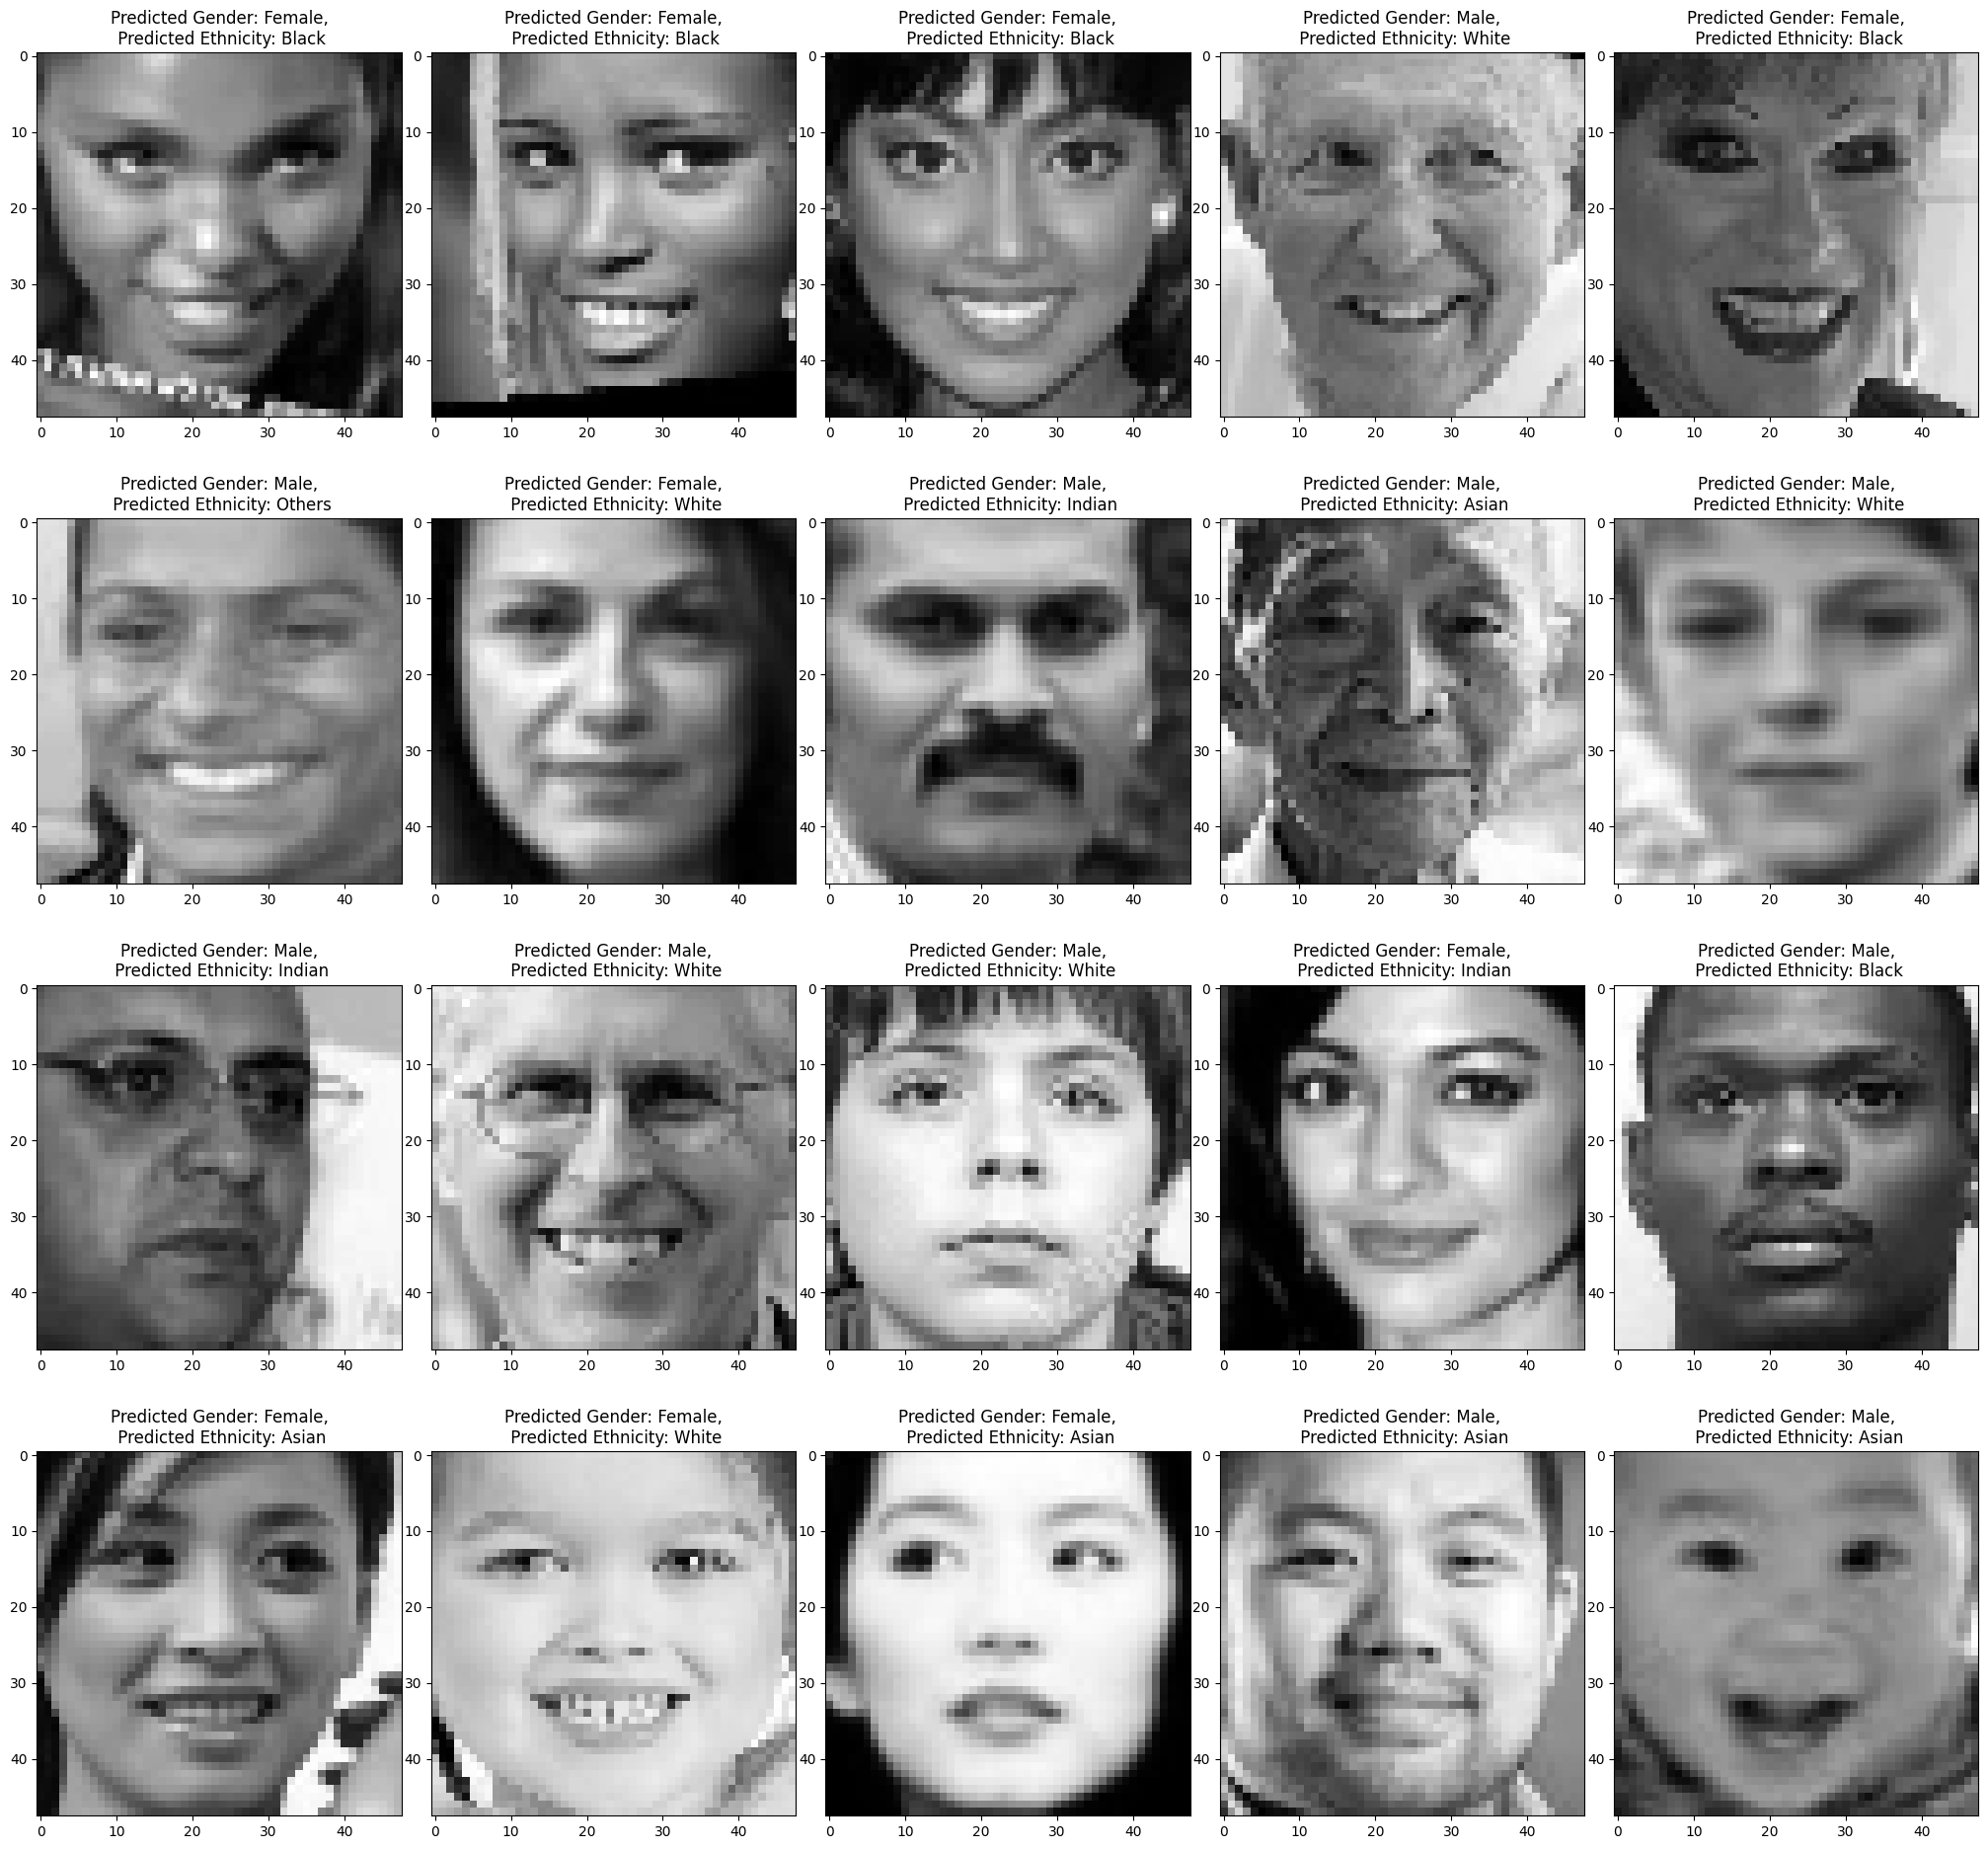

In [ ]:
fig = plt.figure(figsize=(20,20))
count = 0
for i in random_numbers:
  fig.add_subplot(4,5,count+1)
  test_im = test_rgb_images[i]
  test_im = test_im[np.newaxis, :]
  plt.imshow(test_im[0,:,:,0], cmap='gray')
  plt.title(f"Predicted Gender: {labels_genders[predicted_gender[count]]},\n Predicted Ethnicity: {labels_races[predicted_ethnicity[count]]}")
  fig.tight_layout(pad=0.2)
  count += 1

Let's see the predictions on my face:

In [ ]:
image_url = "https://media.licdn.com/dms/image/C4E03AQGoSN-Tvr-sfw/profile-displayphoto-shrink_800_800/0/1566002174950?e=1692230400&v=beta&t=vn8Z8DhReRDE_4af226aD40FQ4ySGyVHHH-6hHc0mOI"

In [ ]:
import requests
from io import BytesIO
from PIL import Image
image_url_resp = requests.get(image_url)
image = Image.open(BytesIO(image_url_resp.content)).convert('L') # convert to grayscale
image = image.resize((48,48))
image = np.array(image, dtype="float32") / 255.0 # normalize pixel values to [0, 1]
image = np.expand_dims(image, axis=-1) # add an extra dimension for the single channel

print(image.shape)

(48, 48, 1)


In [ ]:
rgb_image = np.stack((image,) * 3, axis=-1) / 255.0
rgb_image = np.squeeze(rgb_image)
rgb_image = rgb_image[np.newaxis, :]
print(rgb_image.shape)

(1, 48, 48, 3)


In [ ]:
predictions = loaded_model.predict(rgb_image)
if predictions[1] >= 0.5:
  predicted_gender = 1
else:
  predicted_gender = 0
predicted_ethnicity = np.argmax(predictions[0])

1/1 [==============================] - 0s 23ms/step


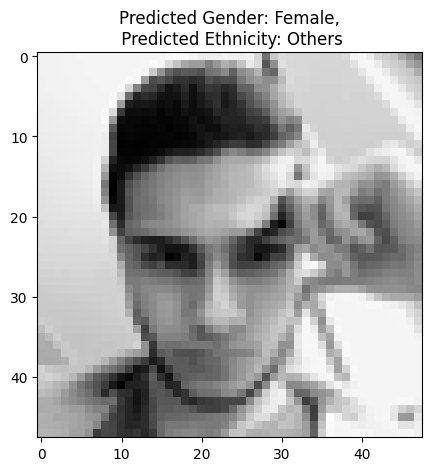

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(rgb_image[0,:,:,0], cmap='gray')
plt.title(f"Predicted Gender: {labels_genders[predicted_gender]},\n Predicted Ethnicity: {labels_races[predicted_ethnicity]}")
plt.show()

Actually, Let's see other predictions for ethnicity:

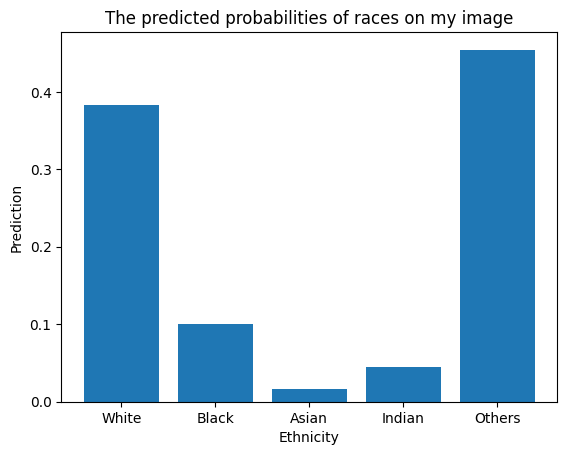

In [ ]:
prd = []
for i in range(len(predictions[0][0])):
  prd.append(predictions[0][0][i])
plt.figure()
plt.bar(labels_races, prd)
plt.xlabel('Ethnicity')
plt.ylabel('Prediction')
plt.title('The predicted probabilities of races on my image')
plt.show()

Further, we can visualize the filters of each convolutional layer in the VGG16 model, and the feature (activation) maps output of convolutional layers.

Layer: block1_conv1
(3, 3, 3, 64)


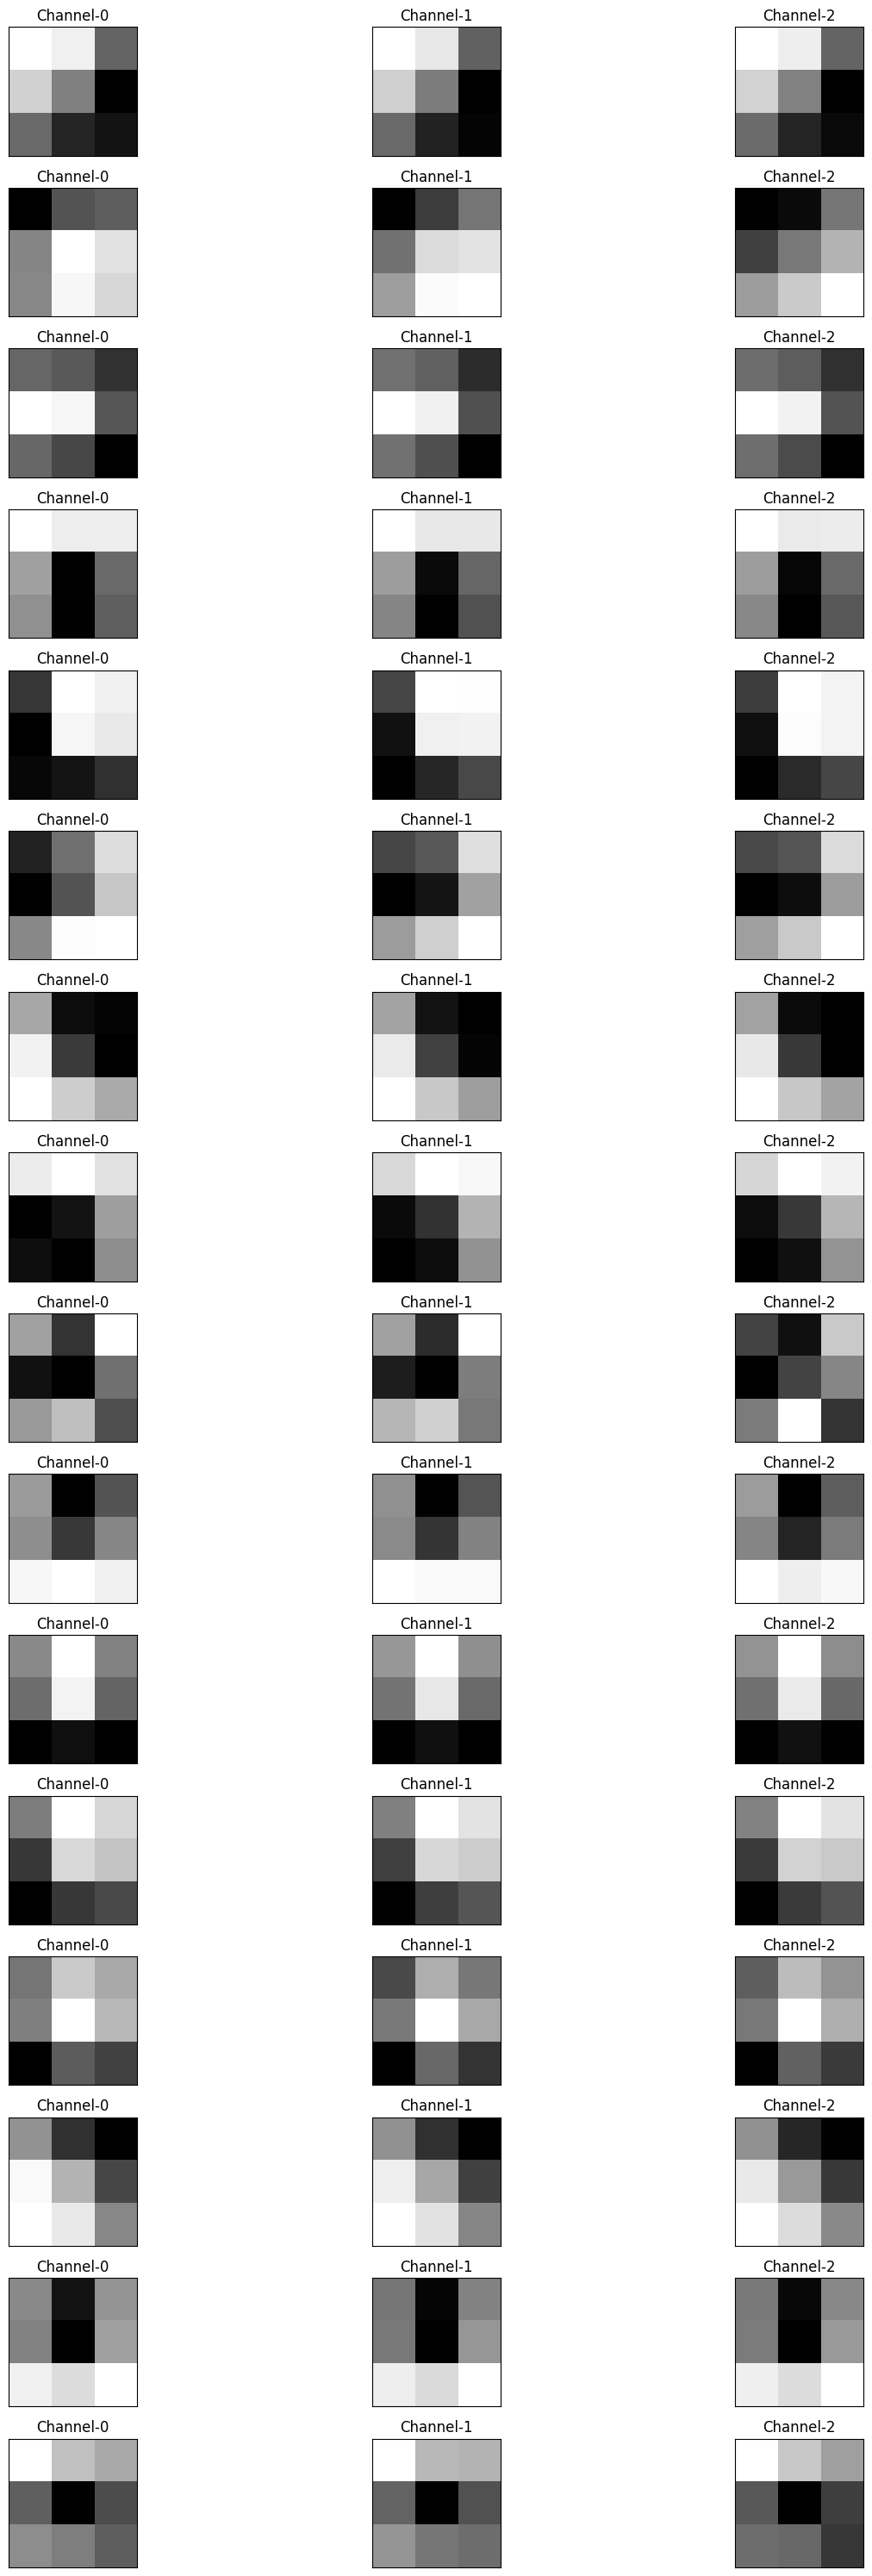

In [ ]:
# Filters of the first hidden layer
lay_num = [1]
ix = 1
fig = plt.figure(figsize=(15, 30))  # Increase the figure size as desired

for num in lay_num: # plotting each layer separately
  print(f"Layer: {model.layers[num].name}")
  filters, biases = loaded_model.layers[num].get_weights()
  f_min, f_max = np.min(filters), np.max(filters)
  filters = (filters-f_min)/(f_max-f_min)
  print(filters.shape)
  filters_height = filters.shape[0]
  filters_width = filters.shape[1]
  filters_channel = filters.shape[2]
  # num_filters = filters.shape[3]
  # we plot only 16 filters for each layer, but you can change it desirably
  num_filters_plot = 16
  for i in range(num_filters_plot): # plot 16 filters in each layer
    f = filters[:,:,:,i]
    for j in range(filters_channel): # separately plot each channel
      ax = plt.subplot(num_filters_plot, filters_channel, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      ax.set_title(f"Channel-{j}")
      plt.imshow(f[:,:,j], cmap='gray')
      ix = ix+1

plt.tight_layout()  # Add spacing between subplots
plt.show()

Layer: block5_conv3
(3, 3, 512, 512)


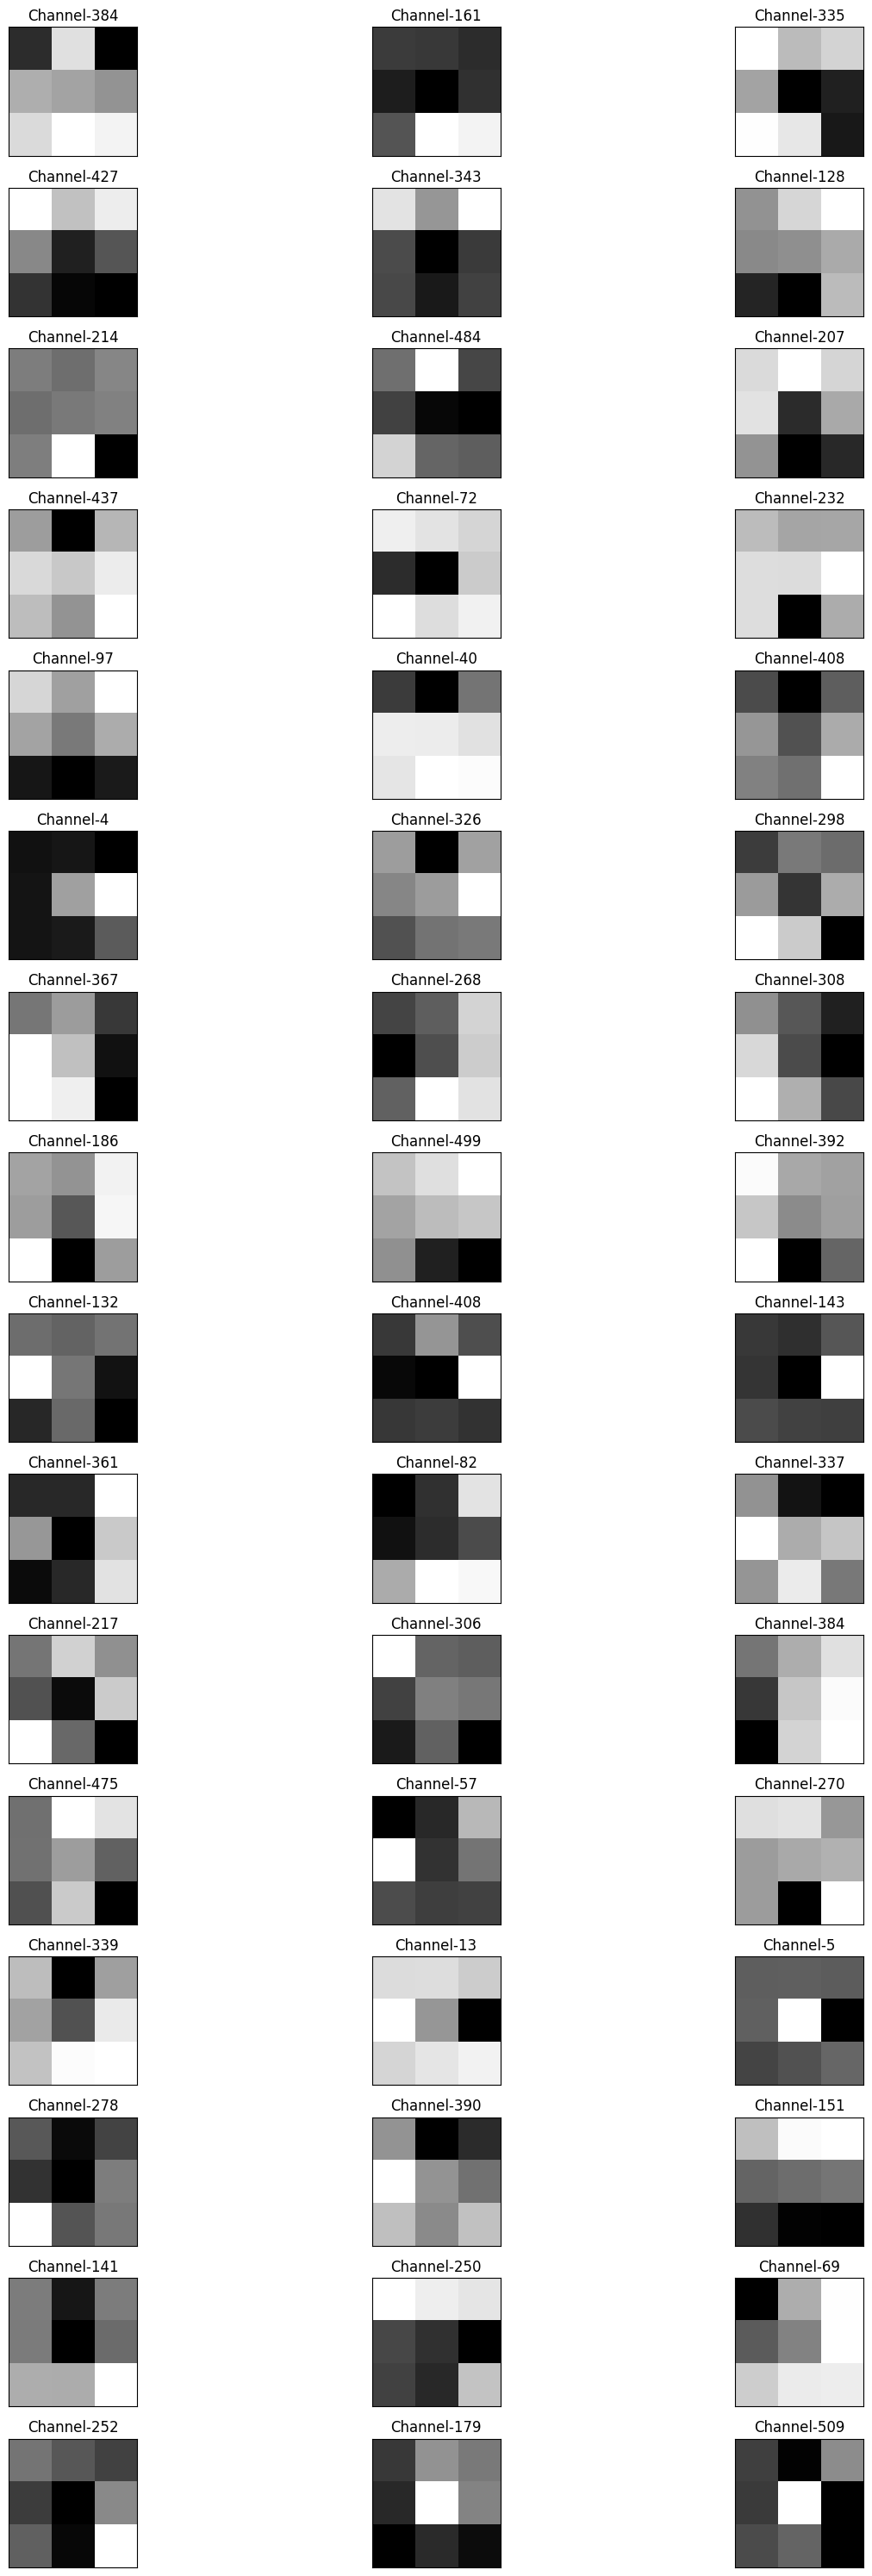

In [ ]:
# Filters of the latest convolutional layer
lay_num = [17]
ix = 1
fig = plt.figure(figsize=(15, 30))  # Increase the figure size as desired

for num in lay_num: # plotting each layer separately
  print(f"Layer: {model.layers[num].name}")
  filters, biases = loaded_model.layers[num].get_weights()
  f_min, f_max = np.min(filters), np.max(filters)
  filters = (filters-f_min)/(f_max-f_min)
  print(filters.shape)
  filters_height = filters.shape[0]
  filters_width = filters.shape[1]
  filters_channel = filters.shape[2]
  # num_filters = filters.shape[3]
  # we plot only 16 filters for each layer, but you can change it desirably
  num_filters_plot = 16
  for i in range(num_filters_plot): # plot 16 filters in each layer
    f = filters[:,:,:,i]
    rand_channels = np.random.randint(0, filters_channel, 3) # there are 512 channels so we randomly chose three
    for j in rand_channels: # separately plot each channel
      ax = plt.subplot(num_filters_plot, len(rand_channels), ix)
      ax.set_xticks([])
      ax.set_yticks([])
      ax.set_title(f"Channel-{j}")
      plt.imshow(f[:,:,j], cmap='gray')
      ix = ix+1

plt.tight_layout()  # Add spacing between subplots
plt.show()

Now, let's also visualize the feature (activation) maps:

In [ ]:
from keras.models import Model
layers = [1]
outputs = [model.layers[i].output for i in layers]
one_output_model = Model(inputs=loaded_model.inputs, outputs=loaded_model.layers[layers[0]].output)
one_output_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# see the features extracted from my face
features = one_output_model.predict(rgb_image)
print(f"The shape of feature map extracted from the first convolutional layer: {features.shape}")

1/1 [==============================] - 0s 136ms/step
The shape of feature map extracted from the first convolutional layer: (1, 48, 48, 64)


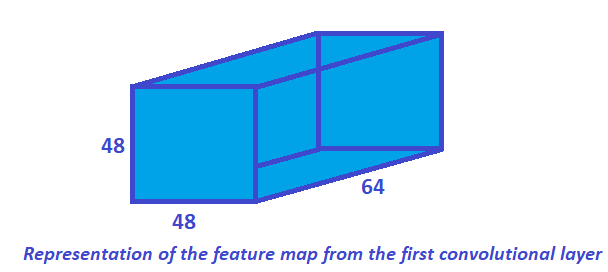

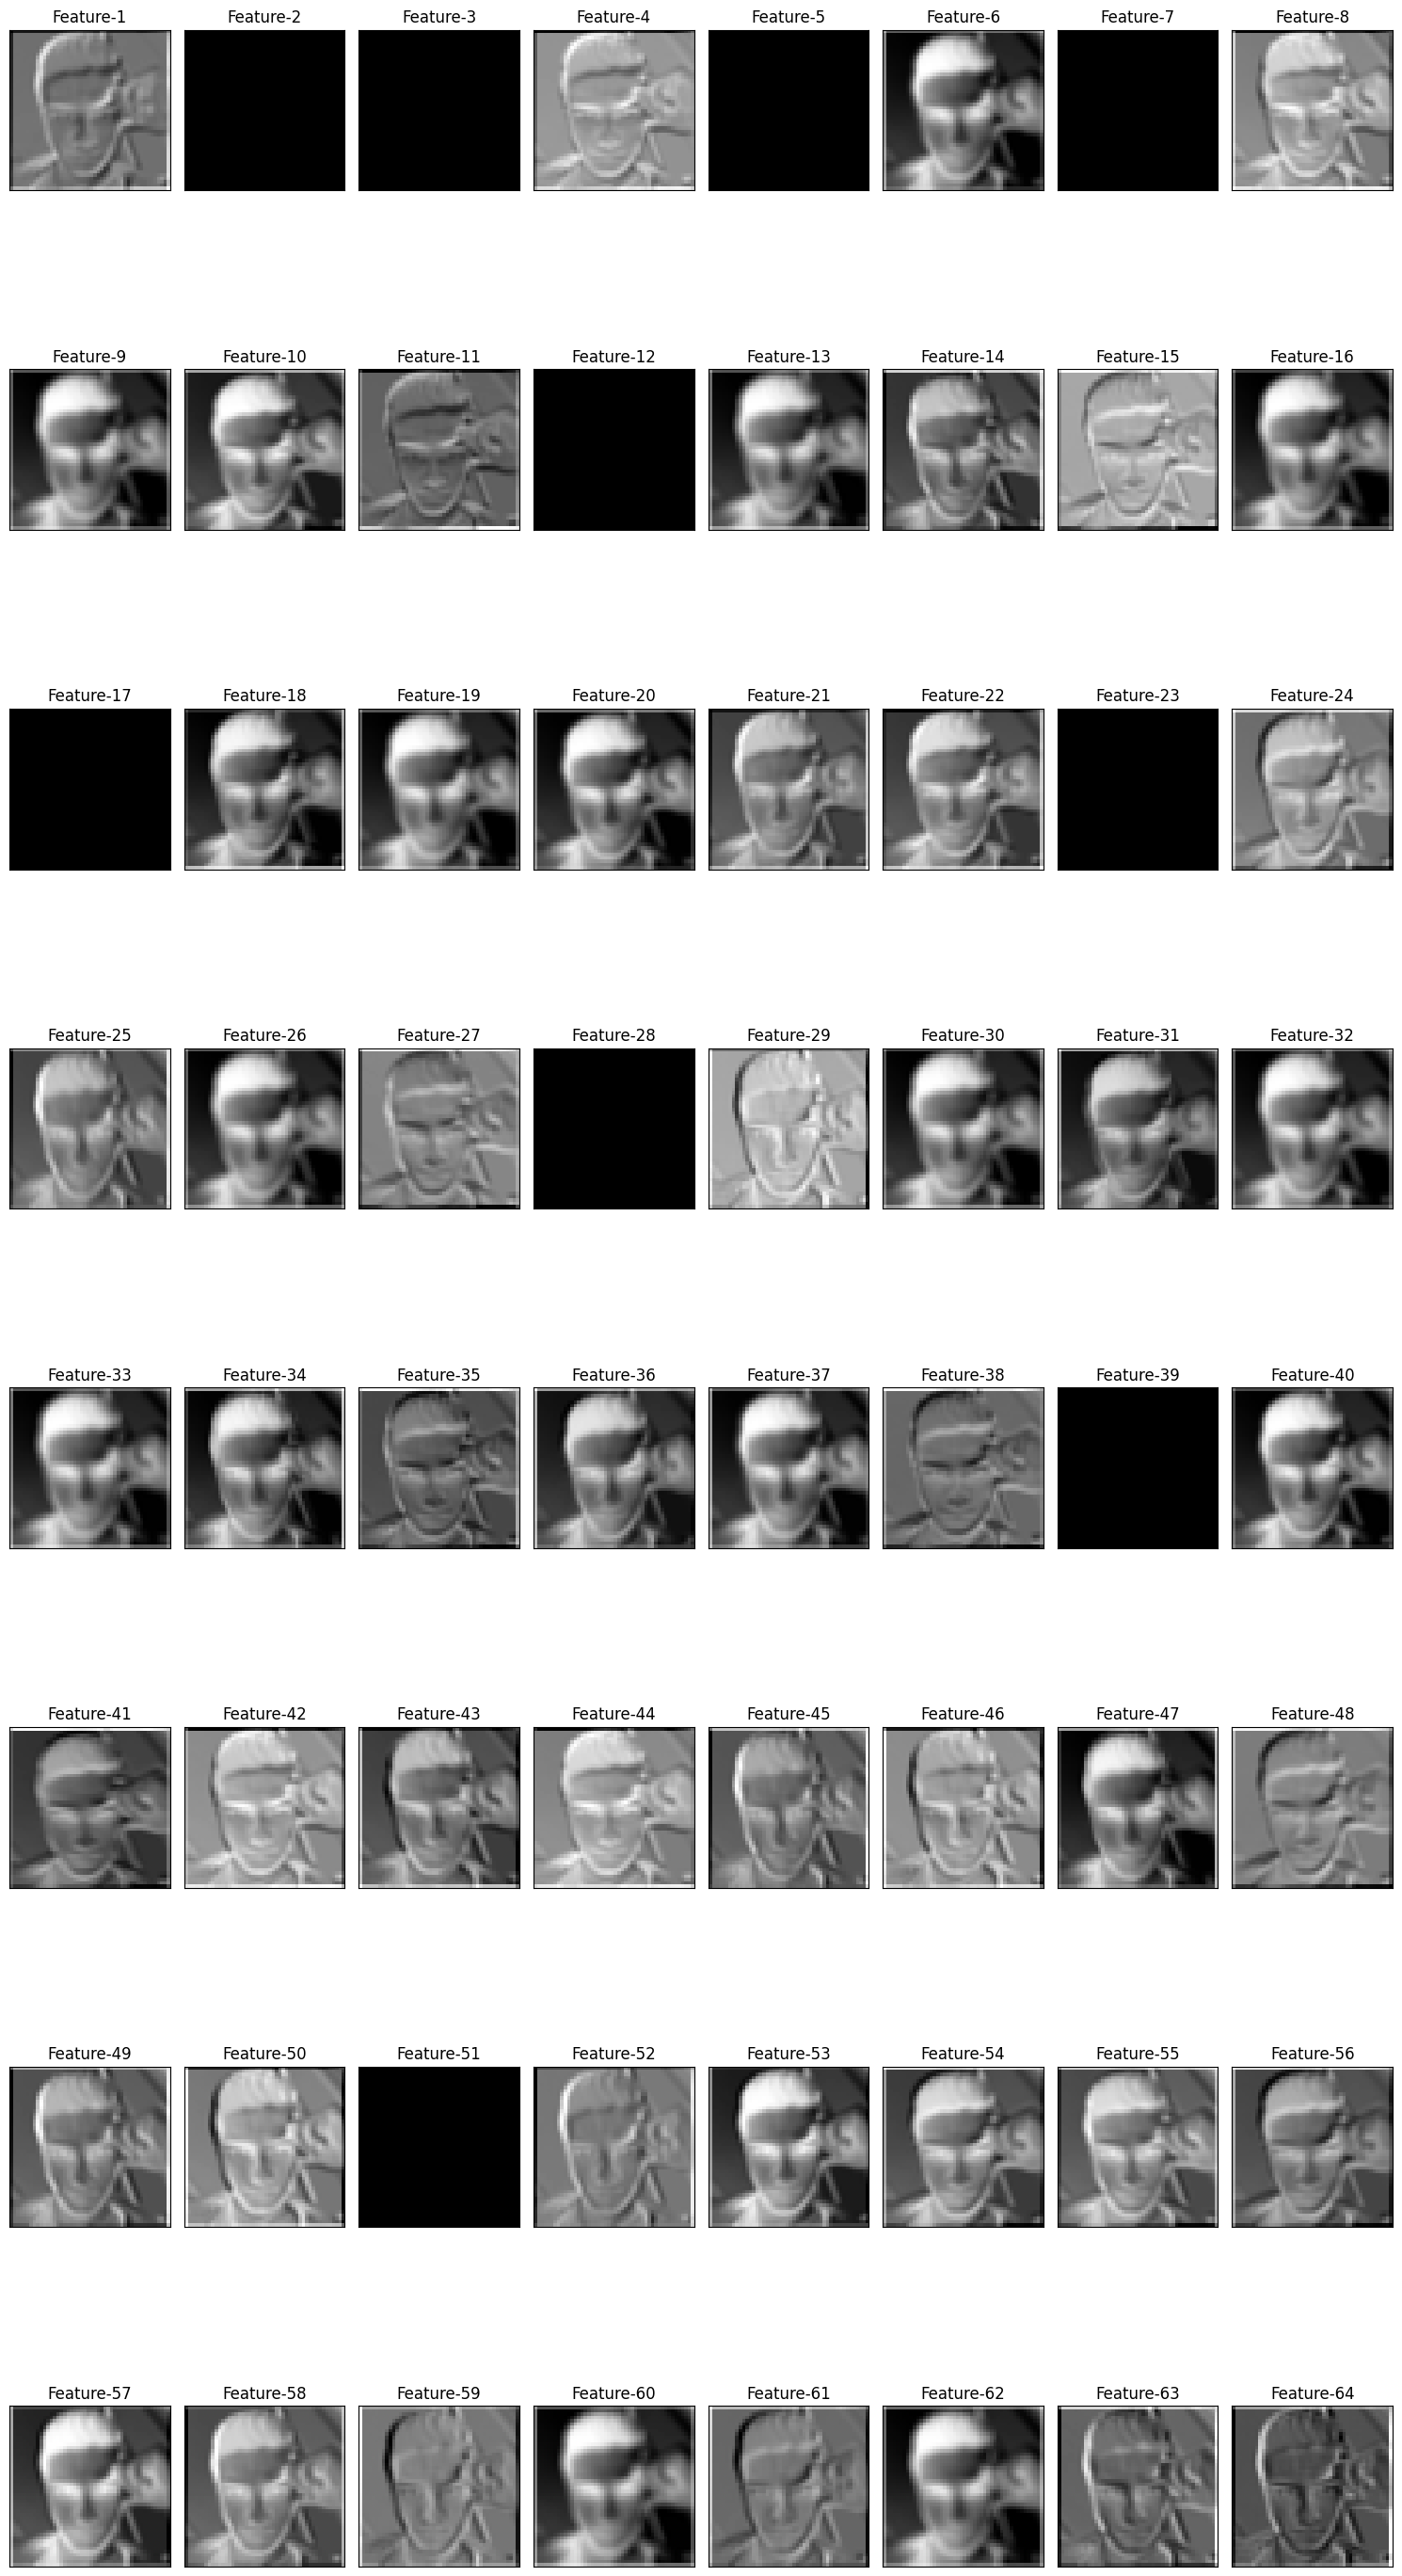

In [ ]:
fig = plt.figure(figsize=(15, 30))  # Increase the figure size as desired
# plot all these 64 feature (activation) maps
ix = 1
for i in range(8):
  for j in range(8):
    ax = plt.subplot(8, 8, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Feature-{ix}")
    plt.imshow(features[0,:,:,ix-1], cmap='gray')
    ix = ix+1

plt.tight_layout()  # Add spacing between subplots
plt.show()

In [ ]:
# Let's now look at the latest convolutional layer's output
layers = [17]
outputs = [model.layers[i].output for i in layers]
one_output_model = Model(inputs=loaded_model.inputs, outputs=loaded_model.layers[layers[0]].output)
one_output_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [ ]:
features_output = one_output_model.predict(rgb_image)
print(f"The shape of feature map extracted from the latest convolutional layerin this VGG16 model: {features_output.shape}")

1/1 [==============================] - 0s 131ms/step
The shape of feature map extracted from the latest convolutional layerin this VGG16 model: (1, 3, 3, 512)


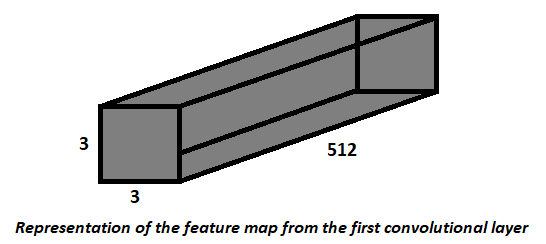

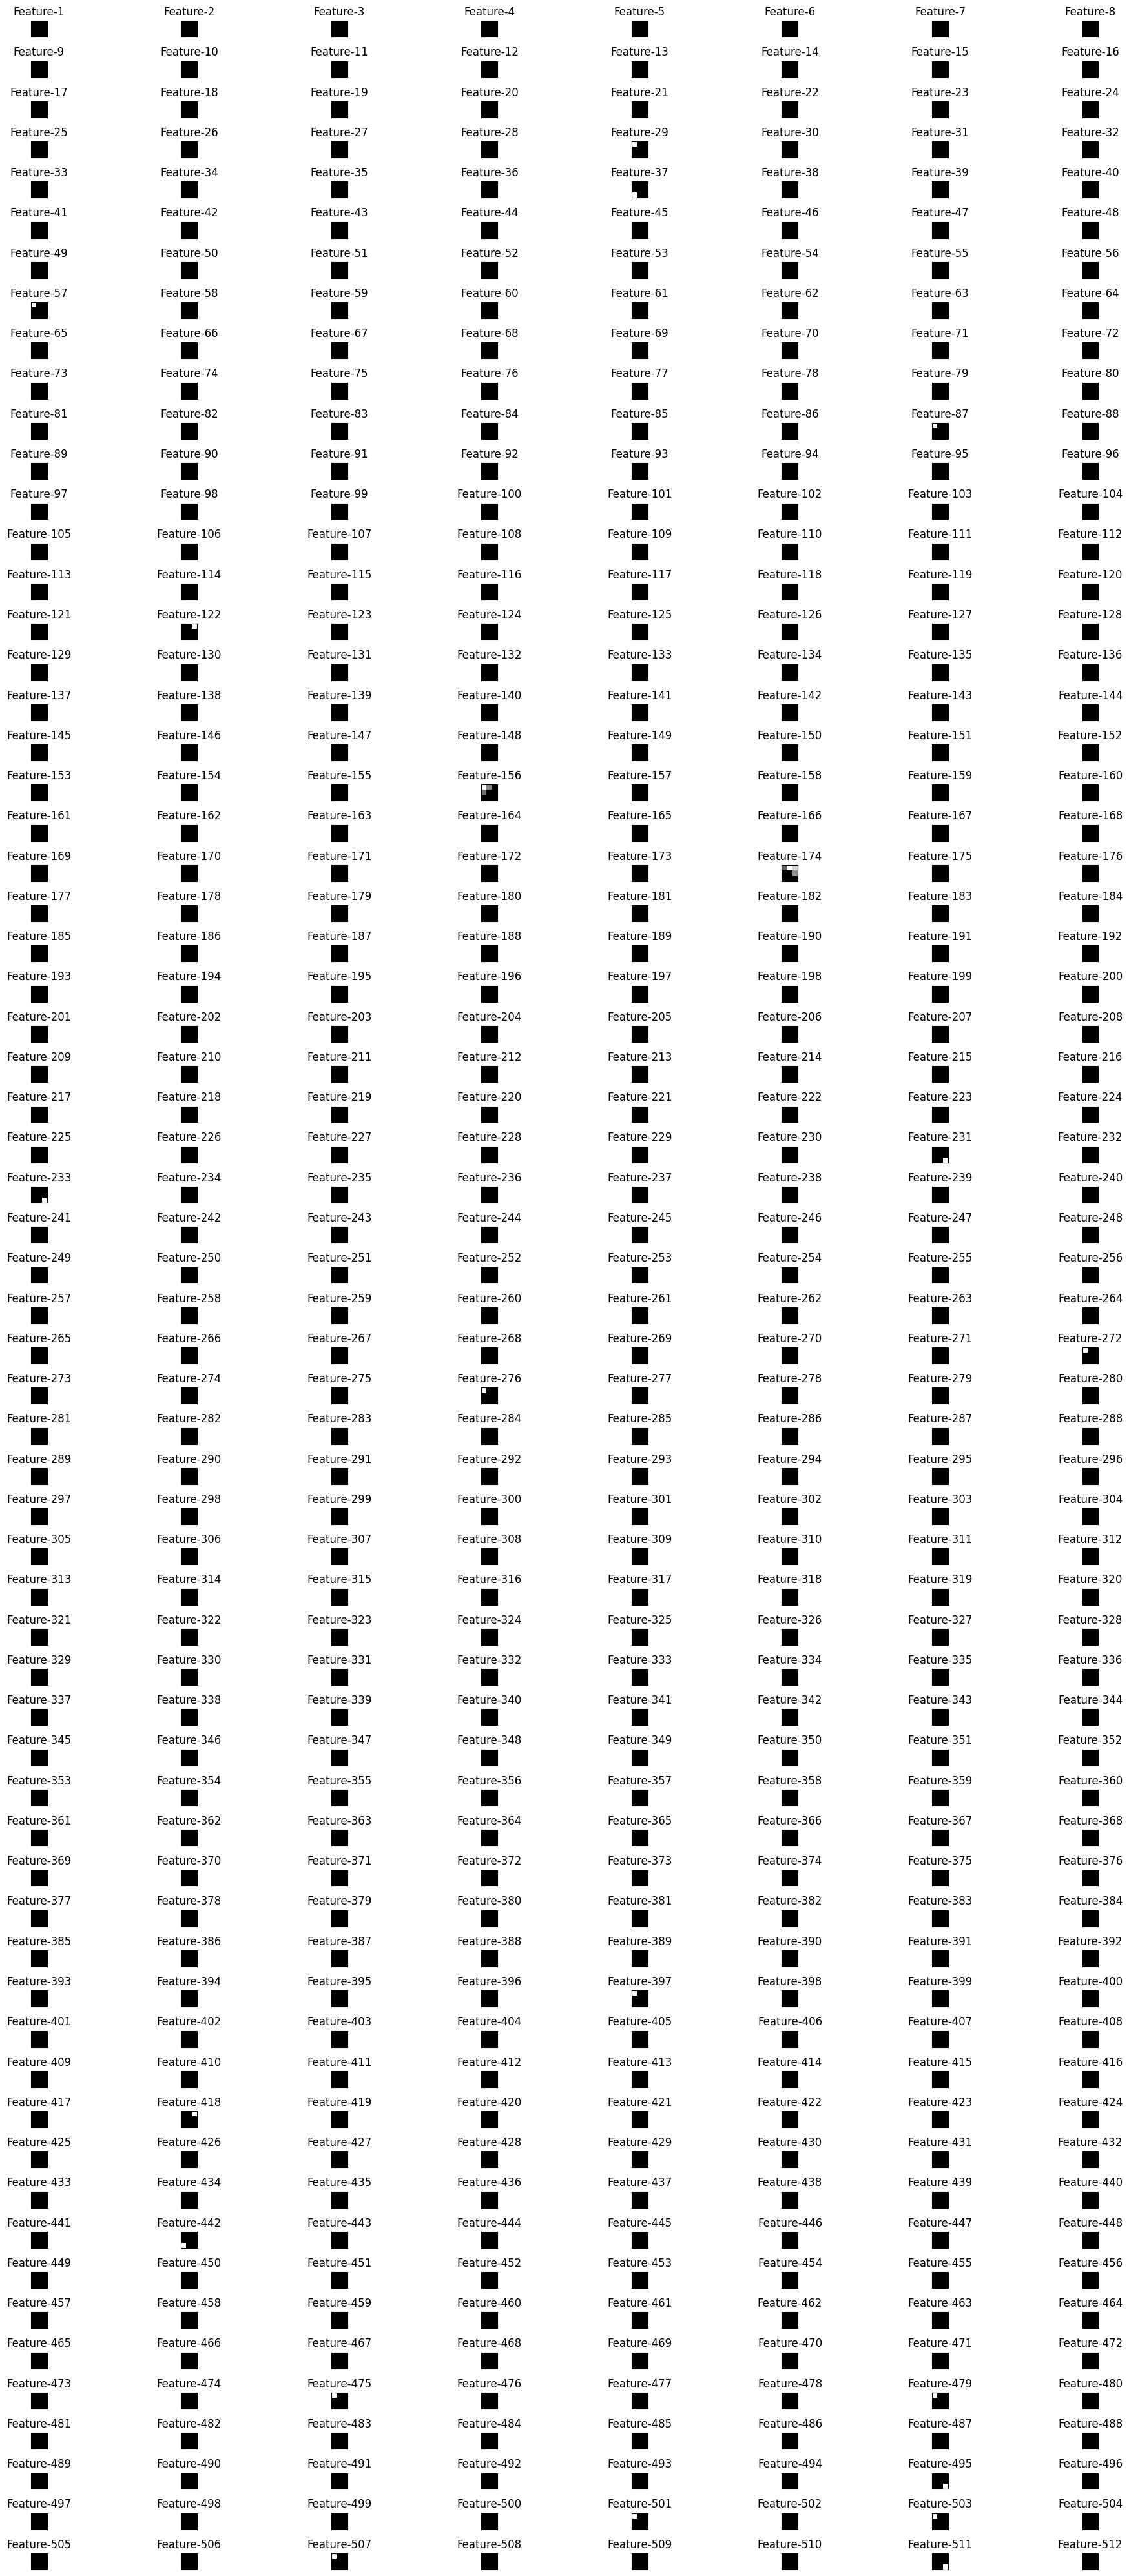

In [ ]:
fig = plt.figure(figsize=(20, 40))  # Increase the figure size as desired
# plot all these 512 feature (activation) maps
ix = 1
for i in range(64):
  for j in range(8):
    ax = plt.subplot(64, 8, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Feature-{ix}")
    plt.imshow(features_output[0,:,:,ix-1], cmap='gray')
    ix = ix+1

plt.tight_layout()  # Add spacing between subplots
plt.show()